# Airlines On-Time Performance, Delays, Cancellations and Diversions

## Milestone 1 - 
### Introduction: 
>Airline cancellations or delays are one of the major causes of passenger inconvenience. With
the publicly available dataset, using data science, I am hoping to gain meaningful insights into the best-performing airlines and understand the causes of delays, diversions and cancellations across different airline carriers. 
For the final project, I would like to analyze airline data to identify different factors and their effects on a carrier's performance. As a performance measure, I would like to explore on-time arrivals, and the number of cancellations by
the carrier and explore different reasons for delays and diversions. Based on the outcome, carriers can take necessary actions to focus on the problem areas.


### Data Source: 
-  Flat File: Excel files from BTS. The Excel data has airline performance factors such as cancelled, diverted, delayed and on-time data. The downloaded raw data has up to 34 columns.
https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E (Download Raw Data link for data).
- API: API provides historical weather information. https://visual-crossing-weather.p.rapidapi.com/history?startDateTime={}&aggregateHours=24&location={}&endDateTime={}&unitGroup=us 
-  Website: The website consists of a list of diverted flights. https://www.diverted.eu/ 
        
    
### Relationships: 
> The Flat file is the main data source with scheduled flight information.

>   Flat File - API:

>   Data from the flat file has cancellations and delays due to weather. I would like to look up the weather information for the flight date at the origin/destination of flights cancelled or delayed due to bad weather. The Bureau data has up to January 2023 data. To look up the weather for a past date, I would need historic weather data. The API gets the historic
weather data for a location (origin or destination city name). This will enable us to validate if there truly was a bad weather situation for a flight to be delayed or cancelled. With this, we can also identify the cause of bad weather like storms, snow, wind, etc.
   
>   - Flat file has many to many relation with the API. We will need to pass the flight date and the origin or destination city to the API to get weather information for a particular date and place.
   
>   Flat File - Website:

>   The flat file has a column for diverted flights but does not have any information on the cause for diversion. I would like to look up the reason for a flight being diverted. The website and flat file can be matched on flight date, origin and destination to lookup diverted flight information.

>  - Flat file has many to many relation with the Website. We will need to pass the flight date and the origin and destination city to the website to get flight diversion details for a particular date and route.


### Project Subject Area: 
>The project aims on identifying various performance measures in airline operations. Using the statistical analysis we can gain insights into the best and least performing airline carriers and the most common reasons for delays and cancellations.


### Challenges:
>The flight performance data size is huge (flat file). I would have to find ways to reduce data to
a reasonable size without losing meaningful information.

    
### Conclusion:
>For the first project milestone, I have identified data from different sources in different formats. I will be applying various data cleansing and visualization techniques on this dataset to gain meaningful insights in the upcoming project milestones.

## Milestone 2 - Cleaning/Formatting Flat File Source

>Flat File: Excel files from BTS. The Excel data has airline performance factors such as cancelled, diverted, delayed and on-time data. The downloaded raw data has up to 34 columns. https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E (Download Raw Data link for data).
The Flat file is the main data source with scheduled flight information.

In [2]:
# Import necessary libraries

import pandas as pd
from datetime import datetime
import numpy as np

#Milestone 3 libraries
from urllib.request import Request, urlopen 
from bs4 import BeautifulSoup

#Milestone 4 libraries
#import requests
import urllib.request, urllib.parse, urllib.error
import json  
import requests
import re

import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [3]:
#Read flight data from "https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?20=E" into a dataframe

flight_data_df = pd.read_csv('T_ONTIME_MARKETING_May.csv')
flight_data_df.head(5)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK               FL_DATE  \
0  2022        2      5             1            7  5/1/2022 12:00:00 AM   
1  2022        2      5             1            7  5/1/2022 12:00:00 AM   
2  2022        2      5             1            7  5/1/2022 12:00:00 AM   
3  2022        2      5             1            7  5/1/2022 12:00:00 AM   
4  2022        2      5             1            7  5/1/2022 12:00:00 AM   

  MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER  ORIGIN_AIRPORT_ID ORIGIN  ...  \
0                 AA                AA              10140    ABQ  ...   
1                 AA                AA              10140    ABQ  ...   
2                 AA                AA              10140    ABQ  ...   
3                 AA                AA              10140    ABQ  ...   
4                 AA                AA              10140    ABQ  ...   

  DIVERTED ACTUAL_ELAPSED_TIME AIR_TIME  FLIGHTS  DISTANCE CARRIER_DELAY  \
0      0.0               104.0     71.0      1.0     569.0           NaN   
1      0.0                97.0     72.0      1.0     569.0           NaN   
2      0.0                98.0     73.0      1.0     569.0           NaN   
3      0.0               110.0     73.0      1.0     569.0           NaN   
4      0.0                93.0     72.0      1.0     569.0           NaN   

  WEATHER_DELAY NAS_DELAY SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
0           NaN       NaN            NaN                  NaN  
1           NaN       NaN            NaN                  NaN  
2           NaN       NaN            NaN                  NaN  
3           NaN       NaN            NaN                  NaN  
4           NaN       NaN            NaN                  NaN  

[5 rows x 39 columns]

### Data Transformation

#### i. Drop  Columns

>Drop unwanted columns to reduce the data size and improve data readability.
Columns that I will not be using for this project are  as follows:


>-    ORIGIN_AIRPORT_ID
>-    ACTUAL_ELAPSED_TIME
>-    AIR_TIME
>-    FLIGHTS
>-    ORIGIN_WAC
>-    DEST_AIRPORT_ID
>-    DEST_WAC
>-    AIR_TIME  

In [4]:
flight_data_df = flight_data_df.drop(columns=['ORIGIN_AIRPORT_ID','ACTUAL_ELAPSED_TIME','AIR_TIME','FLIGHTS',
                          'ORIGIN_WAC','DEST_AIRPORT_ID','DEST_WAC','AIR_TIME'])
flight_data_df.head(5)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK               FL_DATE  \
0  2022        2      5             1            7  5/1/2022 12:00:00 AM   
1  2022        2      5             1            7  5/1/2022 12:00:00 AM   
2  2022        2      5             1            7  5/1/2022 12:00:00 AM   
3  2022        2      5             1            7  5/1/2022 12:00:00 AM   
4  2022        2      5             1            7  5/1/2022 12:00:00 AM   

  MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME  ...  \
0                 AA                AA    ABQ  Albuquerque, NM  ...   
1                 AA                AA    ABQ  Albuquerque, NM  ...   
2                 AA                AA    ABQ  Albuquerque, NM  ...   
3                 AA                AA    ABQ  Albuquerque, NM  ...   
4                 AA                AA    ABQ  Albuquerque, NM  ...   

  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE DIVERTED DISTANCE CARRIER_DELAY  \
0           0.0       0.0               NaN      0.0    569.0           NaN   
1           0.0       0.0               NaN      0.0    569.0           NaN   
2           0.0       0.0               NaN      0.0    569.0           NaN   
3           0.0       0.0               NaN      0.0    569.0           NaN   
4           0.0       0.0               NaN      0.0    569.0           NaN   

   WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
0            NaN        NaN             NaN                  NaN  
1            NaN        NaN             NaN                  NaN  
2            NaN        NaN             NaN                  NaN  
3            NaN        NaN             NaN                  NaN  
4            NaN        NaN             NaN                  NaN  

[5 rows x 32 columns]

#### ii. Look for Duplicates

>Duplicates cause inconsistent results when dealing with statistics. Hence dropping duplicate rows.

In [5]:
print('Dataframe before dropping duplicates :', flight_data_df.shape)
flight_data_df = flight_data_df.drop_duplicates() # 1,389 rows dropped
print('Dataframe after dropping duplicates :',flight_data_df.shape)

Dataframe before dropping duplicates : (602950, 32)
Dataframe after dropping duplicates : (601561, 32)


#### iii. Replace values in a column

> Cancellation code is represented as A, B, C and D, which is not very informative. 
The BTS website provided details on this code as follows:

    - A Carrier

    - B Weather

    - C National Air System

    - D Security

In [6]:
flight_data_df.CANCELLATION_CODE = np.where(flight_data_df.CANCELLATION_CODE=='A', 'Carrier',
                                 np.where(flight_data_df.CANCELLATION_CODE=='B', 'Weather',
                                          np.where(flight_data_df.CANCELLATION_CODE=='C', 'National Air System',
                                                   np.where(flight_data_df.CANCELLATION_CODE=='D', 'Security',''))))

flight_data_df.groupby(['CANCELLATION_CODE'])['CANCELLATION_CODE'].count().sort_index()

CANCELLATION_CODE
                       590957
Carrier                  4902
National Air System      1394
Security                    1
Weather                  4307
Name: CANCELLATION_CODE, dtype: int64

In [7]:
flight_data_df.FL_DATE = pd.to_datetime(flight_data_df['FL_DATE'], format='%m/%d/%Y %H:%M:%S %p').dt.date 
flight_data_df.head(5)
#5/1/2022 12:00:00 AM

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2022        2      5             1            7  2022-05-01   
1  2022        2      5             1            7  2022-05-01   
2  2022        2      5             1            7  2022-05-01   
3  2022        2      5             1            7  2022-05-01   
4  2022        2      5             1            7  2022-05-01   

  MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME  ...  \
0                 AA                AA    ABQ  Albuquerque, NM  ...   
1                 AA                AA    ABQ  Albuquerque, NM  ...   
2                 AA                AA    ABQ  Albuquerque, NM  ...   
3                 AA                AA    ABQ  Albuquerque, NM  ...   
4                 AA                AA    ABQ  Albuquerque, NM  ...   

  ARR_DELAY_NEW CANCELLED CANCELLATION_CODE DIVERTED DISTANCE CARRIER_DELAY  \
0           0.0       0.0                        0.0    569.0           NaN   
1           0.0       0.0                        0.0    569.0           NaN   
2           0.0       0.0                        0.0    569.0           NaN   
3           0.0       0.0                        0.0    569.0           NaN   
4           0.0       0.0                        0.0    569.0           NaN   

   WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  
0            NaN        NaN             NaN                  NaN  
1            NaN        NaN             NaN                  NaN  
2            NaN        NaN             NaN                  NaN  
3            NaN        NaN             NaN                  NaN  
4            NaN        NaN             NaN                  NaN  

[5 rows x 32 columns]

#### iv. Rename Column

>To make more sense of the information in cancellation_code, replacing the column to cancellation reason. 

In [8]:
flight_data_df = flight_data_df.rename(columns={"CANCELLATION_CODE": "CANCELLATION_REASON"}, errors="raise")
flight_data_df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'TAXI_OUT', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'],
      dtype='object')

#### v. Add new columns

##### STATUS

In [9]:
#Adding a new column 'STATUS' that tells the status of a flight 
flight_data_df['STATUS'] = ''
 
flight_data_df.STATUS = np.where(flight_data_df.CANCELLED==1, 'Cancelled',
                                 np.where(flight_data_df.DIVERTED==1, 'Diverted',
                                          np.where(flight_data_df.ARR_DELAY<=15, 'On-Time',
                                                   np.where(flight_data_df.ARR_DELAY>15, 'Delayed',''))))
flight_data_df.groupby(['STATUS'])['STATUS'].count().sort_index()

STATUS
Cancelled     10604
Delayed      119624
Diverted       1581
On-Time      469752
Name: STATUS, dtype: int64

##### DELAYED

>As a step to data reduction, I will be considering flights arriving 15 minutes or later as delayed

In [10]:
#Creating a new column 'DELAYED'. A flag that represents if a flight was delayed. Similar to CANCELLED and DIVERTED 

flight_data_df.loc[(flight_data_df['ARR_DELAY']>15), 'DELAYED'] = True
flight_data_df.loc[(flight_data_df['ARR_DELAY']<=15), 'DELAYED'] = False

flight_data_df.groupby(['DELAYED'])['DELAYED'].count().sort_index()

DELAYED
False    469752
True     119624
Name: DELAYED, dtype: int64

##### DELAY REASON

In [11]:
#Adding a new column 'DELAY_REASON' that tells the reason for a flight getting delayed 
#Using the newly created DELAYED flag and the available columns for each type of delay to create one column with the delay reason.

flight_data_df['DELAY_REASON'] = np.where(((flight_data_df.DELAYED==True) & (flight_data_df.CARRIER_DELAY != 0)), 'Carrier',
                                          np.where(((flight_data_df.DELAYED==True) & (flight_data_df.LATE_AIRCRAFT_DELAY != 0)), 'LateAircraft',
                                                   np.where(((flight_data_df.DELAYED==True) & (flight_data_df.WEATHER_DELAY != 0)), 'Weather',
                                                            np.where(((flight_data_df.DELAYED==True) & (flight_data_df.NAS_DELAY != 0)), 'NAS',
                                                                     np.where(((flight_data_df.DELAYED==True) & (flight_data_df.SECURITY_DELAY != 0)), 'Security','')))))

flight_data_df.groupby(['DELAY_REASON'])['DELAY_REASON'].count().sort_index()

DELAY_REASON
                481937
Carrier          72453
LateAircraft     25504
NAS              17384
Security           131
Weather           4152
Name: DELAY_REASON, dtype: int64

#### vi. Implementing arithmetic functions for statistical analysis 

In [12]:
# Create a new dataframe with total number of flights per operating carrier to calculate the % 

flight_totals = flight_data_df.value_counts(subset=['OP_UNIQUE_CARRIER']).reset_index() #Get total flights per operating carrier
flight_totals_df = pd.DataFrame(flight_totals) # Convert to dataframe
flight_totals_df.columns = ['OP_UNIQUE_CARRIER','TOTAL'] # Assign Column names
flight_totals_df['PERCENTAGE'] = round(flight_totals_df.TOTAL/flight_totals_df.TOTAL.sum()*100,2) #Calculate the percentage

flight_totals_df = flight_totals_df.sort_values('PERCENTAGE',ascending=False) #Sort by percentage (descending)
flight_totals_df.head(5)

OP_UNIQUE_CARRIER   TOTAL  PERCENTAGE
0                WN  107950       17.94
1                DL   76021       12.64
2                AA   71471       11.88
3                OO   66615       11.07
4                UA   53535        8.90

In [13]:
# Calculate percentage by carrier and flight status   
flight_status = flight_data_df.value_counts(subset=['OP_UNIQUE_CARRIER','STATUS']).reset_index() #Get total flights per operating carrier and status 
flight_status_df = pd.DataFrame(flight_status) #create a dataframe
flight_status_df.columns = ['OP_UNIQUE_CARRIER','STATUS', 'COUNT'] #Add column names
flight_status_df = flight_status_df.sort_values('OP_UNIQUE_CARRIER') #Sort by operating carrier

flight_status_df['PERCENTAGE'] = ''
            
for index, row in flight_status_df.iterrows():
    tot = flight_totals.loc[flight_totals.OP_UNIQUE_CARRIER==row.OP_UNIQUE_CARRIER].TOTAL.values #Calculate total per operating carrier to get the status percentage 
    val = (row.COUNT/tot * 100)   
    flight_status_df.at[index,'PERCENTAGE'] = round(val[0].astype(float),2) #Calculate the percentage

flight_status_df.head(10)

OP_UNIQUE_CARRIER     STATUS  COUNT PERCENTAGE
33                9E    Delayed   3113      15.33
48                9E  Cancelled    542       2.67
74                9E   Diverted     35       0.17
8                 9E    On-Time  16613      81.83
41                AA  Cancelled    973       1.36
56                AA   Diverted    215        0.3
3                 AA    On-Time  55403      77.52
11                AA    Delayed  14880      20.82
47                AS  Cancelled    608       3.12
10                AS    On-Time  15502      79.49

In [14]:
#Create a new dataframe with the percentage by origin airport and status
flight_origin_totals = flight_data_df.value_counts(subset=['ORIGIN']).reset_index() #get the counts by origin
flight_origin_totals_df = pd.DataFrame(flight_origin_totals) #create a dataframe
flight_origin_totals_df.columns = ['ORIGIN','TOTAL'] #Add column names
flight_origin_totals_df['PERCENTAGE'] = round(flight_origin_totals_df.TOTAL/flight_origin_totals_df.TOTAL.sum()*100,2) #Calculate the percentage by origin airport
 

origin_airport_delays = flight_data_df.value_counts(subset=['ORIGIN','STATUS']).reset_index() #get counts by origin and status
origin_airport_df = pd.DataFrame(origin_airport_delays) #create a dataframe
origin_airport_df.columns = ['ORIGIN','STATUS', 'COUNT'] #add column names
origin_airport_df = origin_airport_df.sort_values('ORIGIN') #sort by origin
origin_airport_df['PERCENTAGE'] = ''
            
for index, row in origin_airport_df.iterrows():
    tot = flight_origin_totals.loc[flight_origin_totals.ORIGIN==row.ORIGIN].TOTAL.values #get totals per origin & status
    val = (row.COUNT/tot * 100)   
    origin_airport_df.at[index,'PERCENTAGE'] = round(val[0].astype(float),2) #calulate the percentage

origin_airport_df = origin_airport_df.sort_values('PERCENTAGE',ascending=False) #sort by percentage descending
 
origin_airport_df.head(10)

ORIGIN   STATUS  COUNT PERCENTAGE
770     GST  On-Time     12      100.0
1208    STC  On-Time      1      100.0
385     LWS  On-Time     95      96.94
623     BGM  On-Time     30      96.77
470     DRT  On-Time     60      96.77
517     PLN  On-Time     51      96.23
488     MCW  On-Time     55      94.83
490     FOD  On-Time     55      94.83
515     TBN  On-Time     51      94.44
529     LAR  On-Time     50      94.34

#### vii. NULL check

In [15]:
#Looking for null values to further reduce the data size.
flight_data_df.isnull().sum()

YEAR                        0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
MKT_UNIQUE_CARRIER          0
OP_UNIQUE_CARRIER           0
ORIGIN                      0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_ABR            0
ORIGIN_STATE_NM             0
DEST                        0
DEST_CITY_NAME              0
DEST_STATE_ABR              0
DEST_STATE_NM               0
DEP_DELAY               10201
DEP_DELAY_NEW           10201
TAXI_OUT                10558
TAXI_IN                 10769
ARR_TIME                10769
ARR_DELAY               12185
ARR_DELAY_NEW           12185
CANCELLED                   0
CANCELLATION_REASON         0
DIVERTED                    0
DISTANCE                    0
CARRIER_DELAY          477611
WEATHER_DELAY          477611
NAS_DELAY              477611
SECURITY_DELAY         477611
LATE_AIRCRAFT_DELAY    477611
STATUS                      0
DELAYED   

>Based on the above, it doesn't appear there are any null rows that are irrelevant. 
Status is a significant column that tells if there are any flights with no relevant status. All flights are now categorized under On-Time, Delayed, Cancelled or Diverted.

>The final flat file dataset is as follows:

In [16]:
print(flight_data_df.columns)
flight_data_df.head(5)

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEP_DELAY', 'DEP_DELAY_NEW',
       'TAXI_OUT', 'TAXI_IN', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'CANCELLED', 'CANCELLATION_REASON', 'DIVERTED', 'DISTANCE',
       'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY', 'STATUS', 'DELAYED', 'DELAY_REASON'],
      dtype='object')


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2022        2      5             1            7  2022-05-01   
1  2022        2      5             1            7  2022-05-01   
2  2022        2      5             1            7  2022-05-01   
3  2022        2      5             1            7  2022-05-01   
4  2022        2      5             1            7  2022-05-01   

  MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME  ... DIVERTED  \
0                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
1                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
2                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
3                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
4                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   

  DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
0    569.0           NaN           NaN       NaN            NaN   
1    569.0           NaN           NaN       NaN            NaN   
2    569.0           NaN           NaN       NaN            NaN   
3    569.0           NaN           NaN       NaN            NaN   
4    569.0           NaN           NaN       NaN            NaN   

   LATE_AIRCRAFT_DELAY   STATUS  DELAYED  DELAY_REASON  
0                  NaN  On-Time    False                
1                  NaN  On-Time    False                
2                  NaN  On-Time    False                
3                  NaN  On-Time    False                
4                  NaN  On-Time    False                

[5 rows x 35 columns]

### Ethical implications: 
>BTS data - Flat File
I do not see any ethical implications for this dataset as it is from a federal government source and is made accessible to public. The only concern I have is that, the dataset I am referring to is old and it's possible the trend has changed over time. The reason for using old dataset is because I need the flight diversion information which I was only able to find for the year 2022. 

### Conclusion:
> As a part of this milestone, the following Data Transformation steps have been performed.
>1. Dropped columns
>2. Dropped duplicate rows
>3. Replaced values in a dataframe column
>4. Renamed a column
>5. Added new columns to the dataframe
>6. Implemented arithmetic functions for statistical analysis 
>7. Performed null check to drop rows with null values. 

## Milestone 3 - Cleaning/Formatting Website Data

>Flat File - Website:
The flat file has a column for diverted flights but does not have any information on the cause for diversion. I would like to look up the reason for a flight being diverted. The website and flat file can be matched on flight date, origin and destination to lookup diverted flight information.
Flat file has many to many relation with the Website. We will need to pass the flight date and the origin and destination city to the website to get flight diversion details for a particular date and route.

In [17]:
url = 'https://www.diverted.eu/' #Website with diverted flight information

In [18]:
# Parsing HTML using BeautifulSoup
html = urlopen(url) 
soup = BeautifulSoup(html, 'html.parser')

In [19]:
#Parse HTML for the diverted data table
flight_diverted_table = soup.findAll("table", { 'id' : 'tablepress-current_month' })

In [20]:
#Load the data table to a dataframe
flight_diverted_table = pd.read_html(str(flight_diverted_table))
flight_diverted_df = flight_diverted_table[0]
flight_diverted_df

Date   Airlines/Operator     Flight number Departure airport  \
0    20.07.2022            Go First    G8151 / GOW151             Delhi   
1    20.07.2022            Wizz Air  W65058 / WZZ101S              Bari   
2    19.07.2022            Go First    G8386 / GOW386            Mumbai   
3    19.07.2022            Go First  G86202 / GOW6202          Srinagar   
4    19.07.2022                 LOT  LO6297 / LOT6297            Prague   
..          ...                 ...               ...               ...   
679  04.11.2021  Azul Linhas Aéreas  AD4327 / AZU4327            Goiani   
680  02.11.2021     United Airlines    UA818 / UAL818      Buenos Aires   
681  01.11.2021     Delta Air Lines  DL9962 / DAL9962           Atlanta   
682  01.11.2021     Delta Air Lines    DL365 / DAL365           Atlanta   
683  01.11.2021               El Al     LY82 / ELY082           Bangkok   

    Destination airport   Diverted to  Emergency code  \
0              Guwahati        Jaipur             NaN   
1                Krakow      Budapest             NaN   
2                   Leh         Delhi             NaN   
3                 Delhi      Srinagar             NaN   
4              Zanzibar        Warsaw             NaN   
..                  ...           ...             ...   
679            Campinas      Brasilia             NaN   
680             Houston  Buenos Aires             NaN   
681            Key West       Atlanta             NaN   
682         Los Angeles        Dallas             NaN   
683            Tel Aviv           Goa             NaN   

                   Alleged reason                 Aircraft Registration  
0              cracked windshield         Airbus A320-271N       VT-WGP  
1                     bomb threat        Airbus A321-271NX       HA-LGA  
2                    engine issue         Airbus A320-271N       VT-WGA  
3                    engine issue         Airbus A320-271N       VT-WJG  
4                    brakes issue  Boeing 787-9 Dreamliner       SP-LSB  
..                            ...                      ...          ...  
679               technical issue          Embraer E195-E2       PS-AEF  
680          pressurisation issue  Boeing 787-9 Dreamliner       N36962  
681                airspeed issue          Airbus A319-114       N364NB  
682          disruptive passenger          Airbus A321-211       N390DN  
683  possible fuel (system) issue  Boeing 787-9 Dreamliner       4X-EDA  

[684 rows x 10 columns]

### Data Transformation 

#### String to Date conversion

In [21]:
flight_diverted_df.Date.dtype

dtype('O')

>Flight date is formatted as a string (Pandas type 'O' is a string). 

In [22]:
#Format Flight date from string to Date 
flight_diverted_df.Date = pd.to_datetime(flight_diverted_df["Date"], format='%d.%m.%Y').dt.date
flight_diverted_df.head(5)

Date Airlines/Operator     Flight number Departure airport  \
0  2022-07-20          Go First    G8151 / GOW151             Delhi   
1  2022-07-20          Wizz Air  W65058 / WZZ101S              Bari   
2  2022-07-19          Go First    G8386 / GOW386            Mumbai   
3  2022-07-19          Go First  G86202 / GOW6202          Srinagar   
4  2022-07-19               LOT  LO6297 / LOT6297            Prague   

  Destination airport Diverted to  Emergency code      Alleged reason  \
0            Guwahati      Jaipur             NaN  cracked windshield   
1              Krakow    Budapest             NaN         bomb threat   
2                 Leh       Delhi             NaN        engine issue   
3               Delhi    Srinagar             NaN        engine issue   
4            Zanzibar      Warsaw             NaN        brakes issue   

                  Aircraft Registration  
0         Airbus A320-271N       VT-WGP  
1        Airbus A321-271NX       HA-LGA  
2         Airbus A320-271N       VT-WGA  
3         Airbus A320-271N       VT-WJG  
4  Boeing 787-9 Dreamliner       SP-LSB

#### Filter Flights by Date

>Only select data for May'22, since our excel data is for May 2022

In [23]:
diverted_df = flight_diverted_df[(flight_diverted_df.Date >= pd.to_datetime("2022-05-01").date()) & (flight_diverted_df.Date < pd.to_datetime("2022-06-01").date() )]

In [24]:
diverted_df.head(5)

Date  Airlines/Operator     Flight number Departure airport  \
147  2022-05-31   Virgin Australia  VA9223 / VOZ9223             Perth   
148  2022-05-31         Aer Lingus  EI3326 / EAI26MH            Dublin   
149  2022-05-30  American Airlines    AA720 / AAL720         Charlotte   
150  2022-05-29              Swiss   LX340 / SWR340V            Zurich   
151  2022-05-29             Qantas    QF2008 / QLK8D            Sydney   

    Destination airport Diverted to  Emergency code     Alleged reason  \
147           Boolgeeda       Perth             NaN    hydraulic issue   
148          Manchester      Dublin          7700.0    technical issue   
149                Rome   Charlotte             NaN  maintenance issue   
150              London      Zurich             NaN    odor in cockpit   
151            Tamworth      Sydney             NaN    hydraulic issue   

                           Aircraft Registration  
147                 Airbus A320-232       VH-VNB  
148                      ATR 72-600       EI-HDH  
149              Boeing 777-223(ER)       N793AN  
150                 Airbus A220-100       HB-JBI  
151  De Havilland Canada Dash 8-400       VH-QOF

#### Repalce Headers

In [25]:
#Columns before renaming
diverted_df.columns

Index(['Date', 'Airlines/Operator', 'Flight number', 'Departure airport',
       'Destination airport', 'Diverted to', 'Emergency code',
       'Alleged reason', 'Aircraft', 'Registration'],
      dtype='object')

In [26]:
#Renaming columns
diverted_df.columns = ['FL_DATE', 'OP_UNIQUE_CARRIER_NAME', 'FL_NUM', 'ORIGIN_CITY', 'DEST_CITY', 'DIVERTED_TO', 'EMERGENCY_CODE', 'DIVERTED_REASON', 'AIRCRAFT', 'AIRCRAFT_REGISTRATION'] 

In [27]:
#Columns after renaming
diverted_df.head(5)

FL_DATE OP_UNIQUE_CARRIER_NAME            FL_NUM ORIGIN_CITY  \
147  2022-05-31       Virgin Australia  VA9223 / VOZ9223       Perth   
148  2022-05-31             Aer Lingus  EI3326 / EAI26MH      Dublin   
149  2022-05-30      American Airlines    AA720 / AAL720   Charlotte   
150  2022-05-29                  Swiss   LX340 / SWR340V      Zurich   
151  2022-05-29                 Qantas    QF2008 / QLK8D      Sydney   

      DEST_CITY DIVERTED_TO  EMERGENCY_CODE    DIVERTED_REASON  \
147   Boolgeeda       Perth             NaN    hydraulic issue   
148  Manchester      Dublin          7700.0    technical issue   
149        Rome   Charlotte             NaN  maintenance issue   
150      London      Zurich             NaN    odor in cockpit   
151    Tamworth      Sydney             NaN    hydraulic issue   

                           AIRCRAFT AIRCRAFT_REGISTRATION  
147                 Airbus A320-232                VH-VNB  
148                      ATR 72-600                EI-HDH  
149              Boeing 777-223(ER)                N793AN  
150                 Airbus A220-100                HB-JBI  
151  De Havilland Canada Dash 8-400                VH-QOF

In [28]:
diverted_df['OP_UNIQUE_CARRIER'] = diverted_df.FL_NUM.str.slice(0, 2).astype(str)

#diverted_df['ORIGIN'] = diverted_df.FL_NUM.str.slice(0, 2).astype(str)

C:\Users\aarti\AppData\Local\Temp\ipykernel_74008\2621418547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diverted_df['OP_UNIQUE_CARRIER'] = diverted_df.FL_NUM.str.slice(0, 2).astype(str)


#### Drop rows 

###### Drop null rows, if any

In [29]:
print('Data before dropping null rows : ',diverted_df.shape)
diverted_df.dropna()
print('Data after dropping null rows : ', diverted_df.shape)

Data before dropping null rows :  (87, 11)
Data after dropping null rows :  (87, 11)


>No null rows to drop

###### Drop duplicates, if any

In [30]:
print('Dataframe before dropping duplicates :', diverted_df.shape)
diverted_df = diverted_df.drop_duplicates() 
print('Dataframe after dropping duplicates :',diverted_df.shape)
#No duplicates in the website data table

Dataframe before dropping duplicates : (87, 11)
Dataframe after dropping duplicates : (87, 11)


#### Update rows 

>Look for rows with inconsistent reason for diversion 

In [31]:
diverted_df.groupby(['DIVERTED_REASON'])['DIVERTED_REASON'].count() 

DIVERTED_REASON
air conditioning issue          1
bird strike                     8
bomb threat                     1
brakes issue                    1
cracked windshield              1
disruptive passenger            5
engine issue                    4
hydraulic issue                 5
landing gear issue              3
maintenance issue               1
medical emergency              14
odor in cockpit                 1
odor on board                   2
operational reasons             1
possible landing gear issue     1
possible medical emergency      1
possible technical issue        2
pressurisation issue            6
smell on board                  3
smoke indication                1
smoke on board                  1
technical issue                 8
weather radar issue             1
winglet issue                   1
“rostering error”               1
Name: DIVERTED_REASON, dtype: int64

>Rostering error has unwanted quotes. Removing them for consistency.

In [32]:
diverted_df.loc[diverted_df.DIVERTED_REASON == '“rostering error”', 'DIVERTED_REASON'] = 'rostering_error'

In [33]:
#Validate data after update
diverted_df.groupby(['DIVERTED_REASON'])['DIVERTED_REASON'].count() 

DIVERTED_REASON
air conditioning issue          1
bird strike                     8
bomb threat                     1
brakes issue                    1
cracked windshield              1
disruptive passenger            5
engine issue                    4
hydraulic issue                 5
landing gear issue              3
maintenance issue               1
medical emergency              14
odor in cockpit                 1
odor on board                   2
operational reasons             1
possible landing gear issue     1
possible medical emergency      1
possible technical issue        2
pressurisation issue            6
rostering_error                 1
smell on board                  3
smoke indication                1
smoke on board                  1
technical issue                 8
weather radar issue             1
winglet issue                   1
Name: DIVERTED_REASON, dtype: int64

#### Fill NA/NaN values 

In [34]:
print('EMERGENCY_CODE before updating NA/NAN : ',diverted_df.EMERGENCY_CODE.unique())

EMERGENCY_CODE before updating NA/NAN :  [  nan 7700.]


In [35]:
diverted_df = diverted_df.replace(np.nan,'')
#diverted_df = diverted_df.replace(0,'')

In [36]:
diverted_df['ORIGIN'] = "" #Create a new column ORIGIN with the airport code from flight data.
for idx2, div in diverted_df.iterrows():
    #print(idx2, div['ORIGIN_CITY'])
    for idx1, flt in flight_data_df[flight_data_df.DIVERTED==1].iterrows():  
        if div['ORIGIN_CITY'] in flt['ORIGIN_CITY_NAME']:   
            diverted_df.at[idx2,'ORIGIN'] = flt['ORIGIN']
            break;

In [37]:
diverted_df['DESTINATION'] = "" #Create a new column DEST with the airport code from flight data.
for idx2, div in diverted_df.iterrows():
    #print(idx2, div['DEST_CITY'])
    for idx1, flt in flight_data_df[flight_data_df.DIVERTED==1].iterrows(): 
        if div['DEST_CITY'] in flt['DEST_CITY_NAME']:  
            diverted_df.at[idx2,'DESTINATION'] = flt['DEST']
            break;

In [38]:
print('EMERGENCY_CODE after updating NA/NAN : ',diverted_df.EMERGENCY_CODE.unique())

EMERGENCY_CODE after updating NA/NAN :  ['' 7700.0]


In [39]:
#diverted_df.drop(columns =['ORIGIN_DIV'], axis=1, inplace=True)
cols=['FL_DATE','OP_UNIQUE_CARRIER_NAME','FL_NUM','ORIGIN_CITY','DEST_CITY','DIVERTED_TO','EMERGENCY_CODE',
      'DIVERTED_REASON','AIRCRAFT','AIRCRAFT_REGISTRATION','OP_UNIQUE_CARRIER','ORIGIN','DESTINATION']
diverted_df.columns = cols

In [40]:
#diverted_df.loc[diverted_df.DIVERTED_REASON == '0','DIVERTED_REASON']='Reason Unavailable'
diverted_df.loc[diverted_df.DIVERTED_REASON == '','DIVERTED_REASON']='Reason Unavailable'

In [41]:
diverted_df.DIVERTED_REASON.unique()

array(['hydraulic issue', 'technical issue', 'maintenance issue',
       'odor in cockpit', 'medical emergency', 'Reason Unavailable',
       'bird strike', 'cracked windshield', 'smoke indication',
       'possible technical issue', 'landing gear issue',
       'pressurisation issue', 'air conditioning issue',
       'possible medical emergency', 'odor on board', 'engine issue',
       'smell on board', 'disruptive passenger', 'bomb threat',
       'brakes issue', 'weather radar issue',
       'possible landing gear issue', 'operational reasons',
       'winglet issue', 'smoke on board', 'rostering_error'], dtype=object)

In [42]:
diverted_df.head(5)

FL_DATE OP_UNIQUE_CARRIER_NAME            FL_NUM ORIGIN_CITY  \
147  2022-05-31       Virgin Australia  VA9223 / VOZ9223       Perth   
148  2022-05-31             Aer Lingus  EI3326 / EAI26MH      Dublin   
149  2022-05-30      American Airlines    AA720 / AAL720   Charlotte   
150  2022-05-29                  Swiss   LX340 / SWR340V      Zurich   
151  2022-05-29                 Qantas    QF2008 / QLK8D      Sydney   

      DEST_CITY DIVERTED_TO EMERGENCY_CODE    DIVERTED_REASON  \
147   Boolgeeda       Perth                   hydraulic issue   
148  Manchester      Dublin         7700.0    technical issue   
149        Rome   Charlotte                 maintenance issue   
150      London      Zurich                   odor in cockpit   
151    Tamworth      Sydney                   hydraulic issue   

                           AIRCRAFT AIRCRAFT_REGISTRATION OP_UNIQUE_CARRIER  \
147                 Airbus A320-232                VH-VNB                VA   
148                      ATR 72-600                EI-HDH                EI   
149              Boeing 777-223(ER)                N793AN                AA   
150                 Airbus A220-100                HB-JBI                LX   
151  De Havilland Canada Dash 8-400                VH-QOF                QF   

    ORIGIN DESTINATION  
147                     
148                     
149    STT              
150                     
151

### Ethical implications:
>Website Data - 
The data source of the flat file is genuine and reliable (Bureau of Transportation). However, the website may not hold accurate information because it is not government or FAA authorized source. The webiste does not mention the source of data, making the accuracy and legality of data questionable. The website also states the same in the disclaimer. However, on running a high level search for a couple of diverted flight information, we are able to confirm the accuracy of the data.

### Conclusion:
>As a part of this milestone, the following Data Transformation steps have been performed.

>1. Data Type conversion
>2. Renamed columns 
>3. Replaced values in a dataframe column
>4. Filtered data 
>5. Filled NA/NAN values 
>6. Performed checks for duplicates and null rows

## Milestone 4 - Connecting to an API/Pulling in the Data and Cleaning/Formatting

>Data from the flat file has cancellations and delays due to weather. 
The API gets the historic weather data for a location (origin or destination city name). This will enable us to validate if there truly was a bad weather situation for a flight to be delayed or cancelled. With this, we can also identify the cause of bad weather like storms, snow, wind, etc.

In [43]:
#Working with weather delays. Creating a dataframe with only weather delays. 
weather_delay_df = flight_data_df[flight_data_df.DELAY_REASON=='Weather']
print(weather_delay_df.shape)
weather_delay_df.head(5)

(4152, 35)


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
87    2022        2      5             1            7  2022-05-01   
191   2022        2      5             1            7  2022-05-01   
227   2022        2      5             1            7  2022-05-01   
1962  2022        2      5             1            7  2022-05-01   
2000  2022        2      5             1            7  2022-05-01   

     MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN    ORIGIN_CITY_NAME  ...  \
87                   AA                AA    BHM      Birmingham, AL  ...   
191                  AA                AA    CLE       Cleveland, OH  ...   
227                  AA                AA    CLT       Charlotte, NC  ...   
1962                 AA                AA    PIT      Pittsburgh, PA  ...   
2000                 AA                AA    RDU  Raleigh/Durham, NC  ...   

     DIVERTED DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
87        0.0    597.0           0.0          61.0       0.0            0.0   
191       0.0   1737.0           0.0          18.0       0.0            0.0   
227       0.0    361.0           0.0          19.0       6.0            0.0   
1962      0.0   1814.0           0.0          18.0       0.0            0.0   
2000      0.0    587.0           0.0          47.0      12.0            0.0   

      LATE_AIRCRAFT_DELAY   STATUS  DELAYED  DELAY_REASON  
87                    0.0  Delayed     True       Weather  
191                   0.0  Delayed     True       Weather  
227                   0.0  Delayed     True       Weather  
1962                  0.0  Delayed     True       Weather  
2000                  0.0  Delayed     True       Weather  

[5 rows x 35 columns]

In [44]:
#Working with weather cancellation. Creating a dataframe with only weather cancellations. 
weather_cancel_df = flight_data_df[flight_data_df.CANCELLATION_REASON=='Weather']
print(weather_cancel_df.shape)
weather_cancel_df.head(5)

(4307, 35)


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
145   2022        2      5             1            7  2022-05-01   
511   2022        2      5             1            7  2022-05-01   
543   2022        2      5             1            7  2022-05-01   
1024  2022        2      5             1            7  2022-05-01   
1606  2022        2      5             1            7  2022-05-01   

     MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME  ...  \
145                  AA                AA    BOS       Boston, MA  ...   
511                  AA                AA    DCA   Washington, DC  ...   
543                  AA                AA    DEN       Denver, CO  ...   
1024                 AA                AA    IAH      Houston, TX  ...   
1606                 AA                AA    ORD      Chicago, IL  ...   

     DIVERTED DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
145       0.0    867.0           NaN           NaN       NaN            NaN   
511       0.0    612.0           NaN           NaN       NaN            NaN   
543       0.0    888.0           NaN           NaN       NaN            NaN   
1024      0.0    925.0           NaN           NaN       NaN            NaN   
1606      0.0    612.0           NaN           NaN       NaN            NaN   

      LATE_AIRCRAFT_DELAY     STATUS  DELAYED  DELAY_REASON  
145                   NaN  Cancelled      NaN                
511                   NaN  Cancelled      NaN                
543                   NaN  Cancelled      NaN                
1024                  NaN  Cancelled      NaN                
1606                  NaN  Cancelled      NaN                

[5 rows x 35 columns]

#### Function to make the API call to get historic weather data based on flight time and origin. 

In [45]:
def get_historic_geo_data_by_zip(startDateTime, originCityName, endDateTime):
    #url = 'https://visual-crossing-weather.p.rapidapi.com/history?'
    #API key Request Headers
    headers = {"X-RapidAPI-Key": "046c439acamshd081e11265aa749p15f219jsn1275dc460233",
               "X-RapidAPI-Host": "visual-crossing-weather.p.rapidapi.com"}
    #URL
    geocode_request_url = "https://visual-crossing-weather.p.rapidapi.com/history?" 
    #Request Parameters
    parms = {'startDateTime': startDateTime, 'aggregateHours': 24, 'location': originCityName,
             'endDateTime': endDateTime, 'unitGroup': 'us'}
    try:
        #API call to get the weather data at the scheduled time of flight.
        response = requests.get(geocode_request_url, params=parms, headers=headers)
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        print('There was an error in the API call : ', e)
    except requests.exceptions.Timeout as t:
        print('The API call timedout. Please retry.')
    return response

### Data Transformation 

#### 1. Data manipulation using regular expressions to convert response text into a list of keys and values

#### 2. Data transformation to parse the list of keys and values to form a dictionary (key-value pair) 

In [46]:
#Function to process the API response
def process_api_data(response, index):
    try:
        if response.status_code==200: #OK
            try: 
                # The API response is not a formatted JSON. Parsing through the text to create a key-value pair
                json_data = response.text.splitlines()
                if len(json_data) <= 2: #We only expect a list of keys and values. Ideally there shouldn't be a count > 2
                    keys = (re.split(',', json_data[0])) 
                    # replace ', ' by | to be able to split the strings correctly for key value pair
                    values = (json_data[1].replace(', ','|').replace('"', '')).split(',') 
                    #print(len(keys), len(values))
                    if len(keys) == len(values): #Converting to dict only when keys and values count match.
                        for i in range(len(keys)): 
                            historic_weather_data[keys[i]] = values[i]  
                    else:
                        print("Key value pair counts don't match")
            except RuntimeError as ex:
                print('There was an error in processing the API response : ', ex)
        elif response.status_code==404:
            print("Requested historic weather data not found for parms : Fl_Date - ",start_date_time, ' City - ',row.ORIGIN_CITY_NAME)
        else:
            print('Unable to get historic weather data for parms : Fl_Date - ',start_date_time, ' City - ',row.ORIGIN_CITY_NAME)
    except RuntimeError as ex:
        print("There was an error in dictionary creation from API response.")
    
    return historic_weather_data

#### Function call to create the API request, get and process the response.

#### 3. Data transformation to convert the dictionary to a dataframe

In [ ]:
index = 0 
historic_weather_data = {}
weather_delay_api_df = pd.DataFrame()

for inx, row in weather_delay_df.iterrows():
    start_date_time = pd.to_datetime(row.FL_DATE).strftime("%Y-%m-%dT%H:%M:%S") #Fl start time
    end_date_time=start_date_time 

    #Switching back the if condition and reducing the API calls to 2, incase of a rerun to avoid reaching the API limit. 
    #Since this is a public API there is a limit to the number of calls I can make per month.
    #The loop for entire dataframe has been run and the weather_data_df is created for all rows in weather_delay_df.
    #This condition will be removed again for the final project submission 
    
    #if index < 100: 
    #Call funtion to get weather at origin and flight time
    response = get_historic_geo_data_by_zip(start_date_time,row.ORIGIN_CITY_NAME , end_date_time) 

    weather_dict={}
    weather_dict = process_api_data(response, index) #Get each API response in a dict

    df  = pd.DataFrame([weather_dict], columns=weather_dict.keys()) #Convert dict to a dataframe
    df['ORIGIN'] = row['ORIGIN']
    df['DEST_W'] = row['DEST']
    df['FL_DATE'] = row['FL_DATE']
    df['MKT_CARRIER'] = row['MKT_UNIQUE_CARRIER']
    df['OP_CARRIER'] = row['OP_UNIQUE_CARRIER']
    weather_delay_api_df = pd.concat([weather_delay_api_df, df], axis =0).reset_index(drop=True) #Append dict to dataframe rows

    index = index + 1         

In [47]:
weather_delay_api_df = pd.read_csv("weather_delay_data_api-1.csv")

In [48]:
# Final weather_data_df
print(weather_delay_api_df.shape)
weather_delay_api_df.head(2)

(4152, 30)


Address Date time  Minimum Temperature  Maximum Temperature  \
0  Birmingham|AL  5/1/2022                 65.0                 82.1   
1   Cleveland|OH  5/1/2022                 53.1                 74.0   

   Temperature  Dew Point  Relative Humidity  Heat Index  Wind Speed  \
0         73.0       63.6              73.68        83.5        10.8   
1         62.2       45.6              60.20         NaN        18.3   

   Wind Gust  ...  Longitude             Resolved Address  \
0       36.7  ...   -86.8118  Birmingham|AL|United States   
1       30.2  ...   -81.6908   Cleveland|OH|United States   

                          Name  Info             Conditions  ORIGIN  DEST_W  \
0  Birmingham|AL|United States   NaN  Rain|Partially cloudy     BHM     DFW   
1   Cleveland|OH|United States   NaN          Rain|Overcast     CLE     PHX   

    FL_DATE MKT_CARRIER  OP_CARRIER  
0  5/1/2022          AA          AA  
1  5/1/2022          AA          AA  

[2 rows x 30 columns]

>Now that we have the weather data in dataframe, we'll perform the Data Transformation Steps

#### 4. Look for empty rows and null values

In [49]:
weather_delay_api_df.dropna()

Empty DataFrame
Columns: [Address, Date time, Minimum Temperature, Maximum Temperature, Temperature, Dew Point, Relative Humidity, Heat Index, Wind Speed, Wind Gust, Wind Direction, Wind Chill, Precipitation, Precipitation Cover, Snow Depth, Visibility, Cloud Cover, Sea Level Pressure, Weather Type, Latitude, Longitude, Resolved Address, Name, Info, Conditions, ORIGIN, DEST_W, FL_DATE, MKT_CARRIER, OP_CARRIER]
Index: []

[0 rows x 30 columns]

>No null rows to drop.

#### 5. Drop Columns

In [50]:
weather_delay_api_df.groupby(['Info'])['Info'].count().sort_index()
#There doesn't seem to be any relevant information in the Info column.

Series([], Name: Info, dtype: int64)

In [51]:
 weather_delay_api_df[weather_delay_api_df['Resolved Address'] != weather_delay_api_df['Name']]

Empty DataFrame
Columns: [Address, Date time, Minimum Temperature, Maximum Temperature, Temperature, Dew Point, Relative Humidity, Heat Index, Wind Speed, Wind Gust, Wind Direction, Wind Chill, Precipitation, Precipitation Cover, Snow Depth, Visibility, Cloud Cover, Sea Level Pressure, Weather Type, Latitude, Longitude, Resolved Address, Name, Info, Conditions, ORIGIN, DEST_W, FL_DATE, MKT_CARRIER, OP_CARRIER]
Index: []

[0 rows x 30 columns]

>All rows have same data from resolved area and Name. Dropping one of these columns since its a duplicate. Info has all NAN values. Dropping the 2 columns

In [52]:
weather_delay_api_df.drop(columns=['Info', 'Resolved Address','Address', 'Date time'], axis=1, inplace=True)

In [53]:
weather_delay_api_df.shape

(4152, 26)

In [54]:
weather_delay_api_df.groupby(['Conditions'])['Conditions'].value_counts().sort_index()

Conditions             Conditions           
Clear                  Clear                     310
Overcast               Overcast                  197
Partially cloudy       Partially cloudy          722
Rain                   Rain                       60
Rain|Overcast          Rain|Overcast            1170
Rain|Partially cloudy  Rain|Partially cloudy    1693
Name: Conditions, dtype: int64

#### 6. Drop Duplicates

In [55]:
#Dropping dups from the copy and retaining the original df,
#to avoid having to recreate the df with multiple hits to the API. 
weather_data_df_copy = weather_delay_api_df

In [56]:
weather_data_df_copy.shape, weather_delay_api_df.shape

((4152, 26), (4152, 26))

In [57]:
print('Dataframe before dropping duplicates :', weather_data_df_copy.shape)
weather_data_df_copy = weather_data_df_copy.drop_duplicates() # 1,389 rows dropped
print('Dataframe after dropping duplicates :',weather_data_df_copy.shape)

Dataframe before dropping duplicates : (4152, 26)
Dataframe after dropping duplicates : (3905, 26)


#### 7. Replace column names

In [58]:
columns = ['MIN_TEMP', 'MAX_TEMP','TEMP', 'DEW_POINT', 'RELATIVE_HUMIDITY', 'HEAT_INDEX', 'WIND_SPEED',
           'WIND_GUST', 'WIND_DIRECTION', 'WIND_CHILL', 'PRECIPITATION', 'PRECIPITATION_COVER', 'SNOW_DEPTH', 
           'VISIBILITY','CLOUD_COVER', 'SEA_LEVEL_PRESSURE', 'WEATHER_TYPE', 'LATITUDE','LONGITUDE', 'CITY_NAME', 
           'CONDITIONS','ORIGIN_W', 'DEST_W','FL_DATE', 'MKT_CARRIER', 'OP_CARRIER']

weather_delay_api_df.columns = columns
weather_data_df_copy.columns = columns 

#### 8. Fill NA/NaN values, if any

In [59]:
print('MIN_TEMP           : ',len(weather_data_df_copy[weather_data_df_copy.MIN_TEMP.isna()==True]))
print('MAX_TEMP           : ',len(weather_data_df_copy[weather_data_df_copy.MAX_TEMP.isna()==True]))
print('TEMP               : ',len(weather_data_df_copy[weather_data_df_copy.TEMP.isna()==True]))
print('DEW_POINT          : ',len(weather_data_df_copy[weather_data_df_copy.DEW_POINT.isna()==True]))
print('RELATIVE_HUMIDITY  : ',len(weather_data_df_copy[weather_data_df_copy.RELATIVE_HUMIDITY.isna()==True]))
print('HEAT_INDEX         : ',len(weather_data_df_copy[weather_data_df_copy.HEAT_INDEX.isna()==True]))
print('WIND_SPEED         : ',len(weather_data_df_copy[weather_data_df_copy.WIND_SPEED.isna()==True]))
print('WIND_GUST          : ',len(weather_data_df_copy[weather_data_df_copy.WIND_GUST.isna()==True]))
print('WIND_DIRECTION     : ',len(weather_data_df_copy[weather_data_df_copy.WIND_DIRECTION.isna()==True]))
print('WIND_CHILL         : ',len(weather_data_df_copy[weather_data_df_copy.WIND_CHILL.isna()==True]))
print('PRECIPITATION      : ',len(weather_data_df_copy[weather_data_df_copy.PRECIPITATION.isna()==True]))
print('PRECIPITATION_COVER: ',len(weather_data_df_copy[weather_data_df_copy.PRECIPITATION_COVER.isna()==True]))
print('SNOW_DEPTH         : ',len(weather_data_df_copy[weather_data_df_copy.SNOW_DEPTH.isna()==True]))
print('VISIBILITY         : ',len(weather_data_df_copy[weather_data_df_copy.VISIBILITY.isna()==True]))
print('CLOUD_COVER        : ',len(weather_data_df_copy[weather_data_df_copy.CLOUD_COVER.isna()==True]))
print('SEA_LEVEL_PRESSURE : ',len(weather_data_df_copy[weather_data_df_copy.SEA_LEVEL_PRESSURE.isna()==True]))
print('WEATHER_TYPE       : ',len(weather_data_df_copy[weather_data_df_copy.WEATHER_TYPE.isna()==True]))
print('LATITUDE           : ',len(weather_data_df_copy[weather_data_df_copy.LATITUDE.isna()==True]))
print('LONGITUDE          : ',len(weather_data_df_copy[weather_data_df_copy.LONGITUDE.isna()==True]))
print('CITY_NAME          : ',len(weather_data_df_copy[weather_data_df_copy.CITY_NAME.isna()==True]))
print('CONDITIONS         : ',len(weather_data_df_copy[weather_data_df_copy.CONDITIONS.isna()==True]))
print('ORIGIN_W           : ',len(weather_data_df_copy[weather_data_df_copy.ORIGIN_W.isna()==True]))
print('DEST_W             : ',len(weather_data_df_copy[weather_data_df_copy.DEST_W.isna()==True]))
print('FL_DATE            : ',len(weather_data_df_copy[weather_data_df_copy.FL_DATE.isna()==True]))
print('MKT_CARRIER        : ',len(weather_data_df_copy[weather_data_df_copy.MKT_CARRIER.isna()==True]))
print('OP_CARRIER         : ',len(weather_data_df_copy[weather_data_df_copy.OP_CARRIER.isna()==True]))

MIN_TEMP           :  0
MAX_TEMP           :  0
TEMP               :  0
DEW_POINT          :  0
RELATIVE_HUMIDITY  :  0
HEAT_INDEX         :  1707
WIND_SPEED         :  0
WIND_GUST          :  288
WIND_DIRECTION     :  0
WIND_CHILL         :  3486
PRECIPITATION      :  0
PRECIPITATION_COVER:  0
SNOW_DEPTH         :  3902
VISIBILITY         :  1
CLOUD_COVER        :  0
SEA_LEVEL_PRESSURE :  0
WEATHER_TYPE       :  634
LATITUDE           :  0
LONGITUDE          :  0
CITY_NAME          :  0
CONDITIONS         :  0
ORIGIN_W           :  0
DEST_W             :  0
FL_DATE            :  0
MKT_CARRIER        :  0
OP_CARRIER         :  0


In [60]:
weather_data_df_copy.loc[weather_data_df_copy.HEAT_INDEX.isna()==True, 'HEAT_INDEX']=0
weather_data_df_copy.loc[weather_data_df_copy.WIND_GUST.isna()==True, 'WIND_GUST']=0
weather_data_df_copy.loc[weather_data_df_copy.WIND_CHILL.isna()==True, 'WIND_CHILL']=0
weather_data_df_copy.loc[weather_data_df_copy.SNOW_DEPTH.isna()==True, 'SNOW_DEPTH']=0
weather_data_df_copy.loc[weather_data_df_copy.VISIBILITY.isna()==True, 'VISIBILITY']=0
weather_data_df_copy.loc[weather_data_df_copy.WEATHER_TYPE.isna()==True, 'WEATHER_TYPE']='Unavailable'

In [61]:
print('MIN_TEMP           : ',len(weather_data_df_copy[weather_data_df_copy.MIN_TEMP.isna()==True]))
print('MAX_TEMP           : ',len(weather_data_df_copy[weather_data_df_copy.MAX_TEMP.isna()==True]))
print('TEMP               : ',len(weather_data_df_copy[weather_data_df_copy.TEMP.isna()==True]))
print('DEW_POINT          : ',len(weather_data_df_copy[weather_data_df_copy.DEW_POINT.isna()==True]))
print('RELATIVE_HUMIDITY  : ',len(weather_data_df_copy[weather_data_df_copy.RELATIVE_HUMIDITY.isna()==True]))
print('HEAT_INDEX         : ',len(weather_data_df_copy[weather_data_df_copy.HEAT_INDEX.isna()==True]))
print('WIND_SPEED         : ',len(weather_data_df_copy[weather_data_df_copy.WIND_SPEED.isna()==True]))
print('WIND_GUST          : ',len(weather_data_df_copy[weather_data_df_copy.WIND_GUST.isna()==True]))
print('WIND_DIRECTION     : ',len(weather_data_df_copy[weather_data_df_copy.WIND_DIRECTION.isna()==True]))
print('WIND_CHILL         : ',len(weather_data_df_copy[weather_data_df_copy.WIND_CHILL.isna()==True]))
print('PRECIPITATION      : ',len(weather_data_df_copy[weather_data_df_copy.PRECIPITATION.isna()==True]))
print('PRECIPITATION_COVER: ',len(weather_data_df_copy[weather_data_df_copy.PRECIPITATION_COVER.isna()==True]))
print('SNOW_DEPTH         : ',len(weather_data_df_copy[weather_data_df_copy.SNOW_DEPTH.isna()==True]))
print('VISIBILITY         : ',len(weather_data_df_copy[weather_data_df_copy.VISIBILITY.isna()==True]))
print('CLOUD_COVER        : ',len(weather_data_df_copy[weather_data_df_copy.CLOUD_COVER.isna()==True]))
print('SEA_LEVEL_PRESSURE : ',len(weather_data_df_copy[weather_data_df_copy.SEA_LEVEL_PRESSURE.isna()==True]))
print('WEATHER_TYPE       : ',len(weather_data_df_copy[weather_data_df_copy.WEATHER_TYPE.isna()==True]))
print('LATITUDE           : ',len(weather_data_df_copy[weather_data_df_copy.LATITUDE.isna()==True]))
print('LONGITUDE          : ',len(weather_data_df_copy[weather_data_df_copy.LONGITUDE.isna()==True]))
print('CITY_NAME          : ',len(weather_data_df_copy[weather_data_df_copy.CITY_NAME.isna()==True]))
print('CONDITIONS         : ',len(weather_data_df_copy[weather_data_df_copy.CONDITIONS.isna()==True]))
print('ORIGIN_W           : ',len(weather_data_df_copy[weather_data_df_copy.ORIGIN_W.isna()==True]))
print('DEST_W             : ',len(weather_data_df_copy[weather_data_df_copy.DEST_W.isna()==True]))
print('FL_DATE            : ',len(weather_data_df_copy[weather_data_df_copy.FL_DATE.isna()==True]))
print('MKT_CARRIER        : ',len(weather_data_df_copy[weather_data_df_copy.MKT_CARRIER.isna()==True]))
print('OP_CARRIER         : ',len(weather_data_df_copy[weather_data_df_copy.OP_CARRIER.isna()==True]))

MIN_TEMP           :  0
MAX_TEMP           :  0
TEMP               :  0
DEW_POINT          :  0
RELATIVE_HUMIDITY  :  0
HEAT_INDEX         :  0
WIND_SPEED         :  0
WIND_GUST          :  0
WIND_DIRECTION     :  0
WIND_CHILL         :  0
PRECIPITATION      :  0
PRECIPITATION_COVER:  0
SNOW_DEPTH         :  0
VISIBILITY         :  0
CLOUD_COVER        :  0
SEA_LEVEL_PRESSURE :  0
WEATHER_TYPE       :  0
LATITUDE           :  0
LONGITUDE          :  0
CITY_NAME          :  0
CONDITIONS         :  0
ORIGIN_W           :  0
DEST_W             :  0
FL_DATE            :  0
MKT_CARRIER        :  0
OP_CARRIER         :  0


#### 9. Reformat Flight Date

In [69]:
#API Date format
weather_delay_api_df.FL_DATE = pd.to_datetime(weather_delay_api_df['FL_DATE'], format='%Y/%m/%d').dt.date 

#csv Date format
#weather_delay_api_df.FL_DATE = pd.to_datetime(weather_delay_api_df['FL_DATE'], format='%m/%d/%Y').dt.date 

In [70]:
weather_delay_api_df.head(2)

MIN_TEMP  MAX_TEMP  TEMP  DEW_POINT  RELATIVE_HUMIDITY  HEAT_INDEX  \
0      65.0      82.1  73.0       63.6              73.68        83.5   
1      53.1      74.0  62.2       45.6              60.20         NaN   

   WIND_SPEED  WIND_GUST  WIND_DIRECTION  WIND_CHILL  ...  \
0        10.8       36.7          210.17         NaN  ...   
1        18.3       30.2          187.63         NaN  ...   

                                        WEATHER_TYPE  LATITUDE  LONGITUDE  \
0  Lightning Without Thunder|Mist|Thunderstorm|Ra...   33.5207   -86.8118   
1                       Mist|Thunderstorm|Light Rain   41.5047   -81.6908   

                     CITY_NAME             CONDITIONS  ORIGIN_W DEST_W  \
0  Birmingham|AL|United States  Rain|Partially cloudy       BHM    DFW   
1   Cleveland|OH|United States          Rain|Overcast       CLE    PHX   

      FL_DATE  MKT_CARRIER OP_CARRIER  
0  2022-05-01           AA         AA  
1  2022-05-01           AA         AA  

[2 rows x 26 columns]

### Ethical implications:
>API Data - 
The data source of the API is genuine and reliable as stated in the terms of use in the website and I do not see any legal concers in using the data. However, I would like to validate the accuracy of the data by looking up the weather at a certain place and time known to have a bad weather situation.

### Conclusion:
>As a part of this milestone, the following Data Transformation steps have been performed.

>1. Data manipulation using regular expressions to convert response text into a list of keys and values
>2. Data transformation to parse the list of keys and values to form a dictionary (key-value pair) 
>3. Data transformation to convert the dictionary to a dataframe
>4. Look for empty rows and null values
>5. Drop Columns
>6. Drop Duplicates
>7. Replace column names
>8. Fill NA/NaN values, if any 

>During the final project analysis, if there was no concerning weather condition at the origin airport, the same can be run against the destination airport to see if a flight was delayed/cancelled due to bad weather at the destination airport

## Milestone 5 - Merging the Data and Storing in a Database/Visualizing Data

In [71]:
flight_data_df.info() #Get the flight data dataframe info for SQL table creation 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601561 entries, 0 to 602949
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 601561 non-null  int64  
 1   QUARTER              601561 non-null  int64  
 2   MONTH                601561 non-null  int64  
 3   DAY_OF_MONTH         601561 non-null  int64  
 4   DAY_OF_WEEK          601561 non-null  int64  
 5   FL_DATE              601561 non-null  object 
 6   MKT_UNIQUE_CARRIER   601561 non-null  object 
 7   OP_UNIQUE_CARRIER    601561 non-null  object 
 8   ORIGIN               601561 non-null  object 
 9   ORIGIN_CITY_NAME     601561 non-null  object 
 10  ORIGIN_STATE_ABR     601561 non-null  object 
 11  ORIGIN_STATE_NM      601561 non-null  object 
 12  DEST                 601561 non-null  object 
 13  DEST_CITY_NAME       601561 non-null  object 
 14  DEST_STATE_ABR       601561 non-null  object 
 15  DEST_STATE_NM    

In [72]:
weather_delay_api_df.info() #Get the flight data dataframe info for SQL table creation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MIN_TEMP             4152 non-null   float64
 1   MAX_TEMP             4152 non-null   float64
 2   TEMP                 4152 non-null   float64
 3   DEW_POINT            4152 non-null   float64
 4   RELATIVE_HUMIDITY    4152 non-null   float64
 5   HEAT_INDEX           2329 non-null   float64
 6   WIND_SPEED           4152 non-null   float64
 7   WIND_GUST            3831 non-null   float64
 8   WIND_DIRECTION       4152 non-null   float64
 9   WIND_CHILL           438 non-null    float64
 10  PRECIPITATION        4152 non-null   float64
 11  PRECIPITATION_COVER  4152 non-null   float64
 12  SNOW_DEPTH           3 non-null      float64
 13  VISIBILITY           4151 non-null   float64
 14  CLOUD_COVER          4152 non-null   float64
 15  SEA_LEVEL_PRESSURE   4152 non-null   f

In [73]:
#Drop query string to drop table before creating it again. 
#Need this to avoid error from multiple executions of the create table.
drop_flight_data = """DROP TABLE IF EXISTS Flight_Data;""" 

#Query string for table creation
create_flight_data = """ CREATE TABLE IF NOT EXISTS Flight_Data (
                                YEAR                   INTEGER  ,
                                QUARTER                INTEGER  ,
                                MONTH                  INTEGER  ,
                                DAY_OF_MONTH           INTEGER  ,
                                DAY_OF_WEEK            INTEGER  ,
                                FL_DATE                text   ,
                                MKT_UNIQUE_CARRIER     text   ,
                                OP_UNIQUE_CARRIER      text   ,
                                ORIGIN                 text   ,
                                ORIGIN_CITY_NAME       text   ,
                                ORIGIN_STATE_ABR       text   ,
                                ORIGIN_STATE_NM        text   ,
                                DEST                   text   ,
                                DEST_CITY_NAME         text   ,
                                DEST_STATE_ABR         text   ,
                                DEST_STATE_NM          text   ,
                                DEP_DELAY              INTEGER  ,
                                DEP_DELAY_NEW          INTEGER  ,
                                TAXI_OUT               INTEGER  ,
                                TAXI_IN                INTEGER  ,
                                ARR_TIME               INTEGER  ,
                                ARR_DELAY              INTEGER  ,
                                ARR_DELAY_NEW          INTEGER  ,
                                CANCELLED              INTEGER  ,
                                CANCELLATION_REASON    text     ,
                                DIVERTED               INTEGER  ,
                                DISTANCE               INTEGER  ,
                                CARRIER_DELAY          INTEGER  ,
                                WEATHER_DELAY          INTEGER  ,
                                NAS_DELAY              INTEGER  ,
                                SECURITY_DELAY         INTEGER  ,
                                LATE_AIRCRAFT_DELAY    INTEGER  ,
                                STATUS                 text     ,
                                DELAYED                text     ,
                                DELAY_REASON           text      );"""


drop_diversion_data = """DROP TABLE IF EXISTS Diversion_Data;""" 

#Query string for table creation
create_diversion_data = """ CREATE TABLE IF NOT EXISTS Diversion_Data (
                                FL_DATE                text,
                                OP_UNIQUE_CARRIER_NAME text,
                                FL_NUM                 text,
                                ORIGIN_CITY            text,
                                DEST_CITY              text,
                                DIVERTED_TO            text,
                                EMERGENCY_CODE         INTEGER,
                                DIVERTED_REASON        text,
                                AIRCRAFT               text,
                                AIRCRAFT_REGISTRATION  text,
                                OP_UNIQUE_CARRIER      text,
                                ORIGIN                 text,
                                DESTINATION            text);"""


drop_weather_data = """DROP TABLE IF EXISTS Weather_Data;""" 

#Query string for table creation
create_weather_data = """ CREATE TABLE IF NOT EXISTS Weather_Data ( 
                                MIN_TEMP               TEXT,
                                MAX_TEMP               TEXT,
                                TEMP                   TEXT,
                                DEW_POINT              TEXT,
                                RELATIVE_HUMIDITY      TEXT,
                                HEAT_INDEX             TEXT,
                                WIND_SPEED             TEXT,
                                WIND_GUST              TEXT,
                                WIND_DIRECTION         TEXT,
                                WIND_CHILL             TEXT,
                                PRECIPITATION          TEXT,
                                PRECIPITATION_COVER    TEXT,
                                SNOW_DEPTH             TEXT,
                                VISIBILITY             TEXT,
                                CLOUD_COVER            TEXT,
                                SEA_LEVEL_PRESSURE     TEXT,
                                WEATHER_TYPE           TEXT,
                                LATITUDE               TEXT,
                                LONGITUDE              TEXT, 
                                CITY_NAME              TEXT,
                                CONDITIONS             TEXT,
                                ORIGIN_W               TEXT,
                                DEST_W                 TEXT,
                                FL_DATE                TEXT,
                                MKT_CARRIER            TEXT,
                                OP_CARRIER             TEXT );"""

In [74]:
def Sql_execution(tablename, category):
    #Create a cursor to store the DB query return values, if any
    cur = con.cursor()
    
    try:
        #Execute the query string
        if category == "insert":
            try:
                if (tablename == 'Flight_Data'):
                    #Insert rows into the Flight_Data table  
                    flight_data_df.to_sql(tablename,con,if_exists='replace',index=False) #Inserting the dataframe into SQL table
                elif (tablename == 'Diversion_Data'):
                    #Insert rows into the Diversion_Data table .  
                    diverted_df.to_sql(tablename,con,if_exists='replace',index=False) #Inserting the dataframe into SQL table
                elif (tablename == 'Weather_Data'): 
                    #Insert rows into the Weather_Data table  
                    weather_delay_api_df.to_sql(tablename,con,if_exists='replace',index=False) #Inserting the dataframe into SQL table
                elif (tablename == 'Flight_Info'):
                    #Insert rows into the Final Flight Data table  
                    flight_info_df.to_sql(tablename,con,if_exists='replace',index=False) #Inserting the dataframe into SQL table
            except sqlite3.Error as er:
                print('SQLite error: %s' % (' '.join(er.args)))
                print("Exception class is: ", er.__class__)
            except sqlite3.OperationalError:
                print("Error in inserting rows in Flight_Info table.")
            return cur

        elif category == "select":
            try:
                if (tablename == 'Flight_Data'): 
                    # Get the stored df data from SQL and display - Test for data insertion into table
                    db_flight_data_df = pd.read_sql("select * from Flight_Data",con) 
                    return db_flight_data_df 
                elif (tablename == 'Diversion_Data'): 
                    # Get the stored df data from SQL and display - Test for data insertion into table
                    db_diverted_data_df = pd.read_sql("select * from Diversion_Data",con) 
                    return db_diverted_data_df 
                elif (tablename == 'Weather_Data'):
                    # Get the stored df data from SQL and display - Test for data insertion into table
                    db_weather_data_df = pd.read_sql("select * from Weather_Data",con) 
                    return db_weather_data_df 
                elif (tablename == 'Flight_Info'):
                    # Get the stored df data from SQL and display - Test for data insertion into table
                    db_flight_info_df = pd.read_sql("select * from Flight_Info",con) 
                    return db_flight_info_df
            except sqlite3.Error as er:
                print('SQLite error: %s' % (' '.join(er.args)))
                print("Exception class is: ", er.__class__)
            except sqlite3.OperationalError:
                print('Error in reading table %s :' % tablename)
        elif category == "create":
            try:
                if (tablename == 'Flight_Data'):
                    #Create the table
                    cur.execute(create_flight_data) 
                elif (tablename == 'Diversion_Data'):
                    #Create the table
                    cur.execute(create_diversion_data) 
                elif (tablename == 'Weather_Data'):
                    #Create the table
                    cur.execute(create_weather_data)  
                elif (tablename == 'Flight_Info'): 
                    #Create the table
                    cur.execute(create_flight_info_data) 
            except sqlite3.Error as er:
                print('SQLite error: %s' % (' '.join(er.args)))
                print("Exception class is: ", er.__class__)
            except sqlite3.OperationalError:
                print('Error in creating table %s' % tablename)
            return cur
        elif category == "drop":
            try:
                if (tablename == 'Flight_Data'):
                    cur.execute(drop_flight_data) 
                elif (tablename == 'Diversion_Data'): 
                    cur.execute(drop_diversion_data) 
                elif (tablename == 'Weather_Data'): 
                    cur.execute(drop_weather_data) 
                elif (tablename == 'Flight_Info'):
                    cur.execute(drop_flight_info_data)
            except sqlite3.Error as er:
                print('SQLite error: %s' % (' '.join(er.args)))
                print("Exception class is: ", er.__class__)
            except sqlite3.Error as er:
                print('SQLite error in dropping the table : %s' % (' '.join(er.args)))     
                return cur
        else:
            print("No SQL Execution")
    except RuntimeError as err:
        print("There was an error in the SQL Execution : ", err)

In [75]:
# create a database connection
con = sqlite3.connect('mydata.sqlite') 

### SQL table creation 

In [76]:
#Create list of tables to create and insert
sql_exec_list = ['Flight_Data','Diversion_Data','Weather_Data']

if len(sql_exec_list) > 0:
    for i in range(len(sql_exec_list)):
        try:
            drop_resp = Sql_execution(sql_exec_list[i], "drop")
            #print('Drop table response : ',drop_resp.rowcount)
            create_resp = Sql_execution(sql_exec_list[i], "create")
            #print('Create table response : ',create_resp.rowcount)
            insert_resp = Sql_execution(sql_exec_list[i], "insert")
            insert_resp.rowcount
            #print('Insert table response : ',insert_resp.rowcount)
            select_resp = Sql_execution(sql_exec_list[i], "select")
            #print('Select table response : ',select_resp)
            if i==0:
                db_flight_data_df = select_resp
            elif i==1:
                db_diverted_data_df = select_resp
            elif i==2:
                db_weather_data_df = select_resp                
        except RuntimeError as err:
            print('There was an error in the SQL execution : ', err)

In [77]:
db_flight_data_df.head(5)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2022        2      5             1            7  2022-05-01   
1  2022        2      5             1            7  2022-05-01   
2  2022        2      5             1            7  2022-05-01   
3  2022        2      5             1            7  2022-05-01   
4  2022        2      5             1            7  2022-05-01   

  MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN ORIGIN_CITY_NAME  ... DIVERTED  \
0                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
1                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
2                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
3                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   
4                 AA                AA    ABQ  Albuquerque, NM  ...      0.0   

  DISTANCE CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
0    569.0           NaN           NaN       NaN            NaN   
1    569.0           NaN           NaN       NaN            NaN   
2    569.0           NaN           NaN       NaN            NaN   
3    569.0           NaN           NaN       NaN            NaN   
4    569.0           NaN           NaN       NaN            NaN   

   LATE_AIRCRAFT_DELAY   STATUS  DELAYED  DELAY_REASON  
0                  NaN  On-Time      0.0                
1                  NaN  On-Time      0.0                
2                  NaN  On-Time      0.0                
3                  NaN  On-Time      0.0                
4                  NaN  On-Time      0.0                

[5 rows x 35 columns]

In [78]:
db_diverted_data_df.head(5)

FL_DATE OP_UNIQUE_CARRIER_NAME            FL_NUM ORIGIN_CITY  \
0  2022-05-31       Virgin Australia  VA9223 / VOZ9223       Perth   
1  2022-05-31             Aer Lingus  EI3326 / EAI26MH      Dublin   
2  2022-05-30      American Airlines    AA720 / AAL720   Charlotte   
3  2022-05-29                  Swiss   LX340 / SWR340V      Zurich   
4  2022-05-29                 Qantas    QF2008 / QLK8D      Sydney   

    DEST_CITY DIVERTED_TO EMERGENCY_CODE    DIVERTED_REASON  \
0   Boolgeeda       Perth                   hydraulic issue   
1  Manchester      Dublin         7700.0    technical issue   
2        Rome   Charlotte                 maintenance issue   
3      London      Zurich                   odor in cockpit   
4    Tamworth      Sydney                   hydraulic issue   

                         AIRCRAFT AIRCRAFT_REGISTRATION OP_UNIQUE_CARRIER  \
0                 Airbus A320-232                VH-VNB                VA   
1                      ATR 72-600                EI-HDH                EI   
2              Boeing 777-223(ER)                N793AN                AA   
3                 Airbus A220-100                HB-JBI                LX   
4  De Havilland Canada Dash 8-400                VH-QOF                QF   

  ORIGIN DESTINATION  
0                     
1                     
2    STT              
3                     
4

In [79]:
db_weather_data_df.head(5)

MIN_TEMP  MAX_TEMP  TEMP  DEW_POINT  RELATIVE_HUMIDITY  HEAT_INDEX  \
0      65.0      82.1  73.0       63.6              73.68        83.5   
1      53.1      74.0  62.2       45.6              60.20         NaN   
2      57.3      80.5  68.6       59.5              73.82        81.8   
3      53.5      70.4  60.8       46.6              64.71         NaN   
4      50.5      82.2  65.0       57.3              79.50        82.6   

   WIND_SPEED  WIND_GUST  WIND_DIRECTION  WIND_CHILL  ...  \
0        10.8       36.7          210.17         NaN  ...   
1        18.3       30.2          187.63         NaN  ...   
2        13.1       20.7          222.67         NaN  ...   
3         9.2       23.5          144.33         NaN  ...   
4        12.5       20.8          132.92         NaN  ...   

                                        WEATHER_TYPE  LATITUDE  LONGITUDE  \
0  Lightning Without Thunder|Mist|Thunderstorm|Ra...   33.5207   -86.8118   
1                       Mist|Thunderstorm|Light Rain   41.5047   -81.6908   
2                          Lightning Without Thunder   35.2229   -80.8380   
3  Lightning Without Thunder|Mist|Thunderstorm|Ra...   40.4385   -79.9973   
4  Mist|Light Drizzle|Thunderstorm|Rain|Fog|Heavy...   35.9869   -78.6686   

                                  CITY_NAME             CONDITIONS  ORIGIN_W  \
0               Birmingham|AL|United States  Rain|Partially cloudy       BHM   
1                Cleveland|OH|United States          Rain|Overcast       CLE   
2                Charlotte|NC|United States  Rain|Partially cloudy       CLT   
3               Pittsburgh|PA|United States          Rain|Overcast       PIT   
4  Durham Rd|Raleigh|NC 27614|United States  Rain|Partially cloudy       RDU   

  DEST_W     FL_DATE  MKT_CARRIER OP_CARRIER  
0    DFW  2022-05-01           AA         AA  
1    PHX  2022-05-01           AA         AA  
2    BWI  2022-05-01           AA         AA  
3    PHX  2022-05-01           AA         AA  
4    TPA  2022-05-01           AA         AA  

[5 rows x 26 columns]

In [80]:
drop_flight_info_data = """DROP TABLE IF EXISTS Flight_Info;""" 

#Query string for table creation
create_flight_info_data = """ CREATE TABLE IF NOT EXISTS Flight_Info (
                            YEAR                    INTEGER,
                            QUARTER                 INTEGER,
                            MONTH                   INTEGER,
                            DAY_OF_MONTH            INTEGER,
                            DAY_OF_WEEK             INTEGER,
                            FL_DATE                 TEXT, 
                            MKT_UNIQUE_CARRIER      TEXT, 
                            OP_UNIQUE_CARRIER       TEXT, 
                            ORIGIN                  TEXT, 
                            ORIGIN_CITY_NAME        TEXT, 
                            ORIGIN_STATE_ABR        TEXT, 
                            ORIGIN_STATE_NM         TEXT, 
                            DEST                    TEXT, 
                            DEST_CITY_NAME          TEXT, 
                            DEST_STATE_ABR          TEXT, 
                            DEST_STATE_NM           TEXT, 
                            DEP_DELAY               INTEGER,
                            DEP_DELAY_NEW           INTEGER,
                            TAXI_OUT                INTEGER,
                            TAXI_IN                 INTEGER,
                            ARR_TIME                INTEGER,
                            ARR_DELAY               INTEGER,
                            ARR_DELAY_NEW           INTEGER,
                            CANCELLED               INTEGER,
                            CANCELLATION_REASON     TEXT, 
                            DIVERTED                INTEGER,
                            DISTANCE                INTEGER,
                            CARRIER_DELAY           INTEGER,
                            WEATHER_DELAY           INTEGER,
                            NAS_DELAY               INTEGER,
                            SECURITY_DELAY          INTEGER,
                            LATE_AIRCRAFT_DELAY     INTEGER,
                            STATUS                  TEXT, 
                            DELAYED                 INTEGER,
                            DELAY_REASON            TEXT, 
                            OP_UNIQUE_CARRIER_NAME  TEXT, 
                            FL_NUM                  TEXT, 
                            ORIGIN_CITY             TEXT, 
                            DEST_CITY               TEXT, 
                            DIVERTED_TO             TEXT, 
                            EMERGENCY_CODE          INTEGER,
                            DIVERTED_REASON         TEXT, 
                            AIRCRAFT                TEXT, 
                            AIRCRAFT_REGISTRATION   TEXT, 
                            DESTINATION             TEXT, 
                            MIN_TEMP                INTEGER,
                            MAX_TEMP                INTEGER,
                            TEMP                    INTEGER,
                            DEW_POINT               INTEGER,
                            RELATIVE_HUMIDITY       INTEGER,
                            HEAT_INDEX              INTEGER,
                            WIND_SPEED              INTEGER,
                            WIND_GUST               INTEGER,
                            WIND_DIRECTION          INTEGER,
                            WIND_CHILL              INTEGER,
                            PRECIPITATION           INTEGER,
                            PRECIPITATION_COVER     INTEGER,
                            SNOW_DEPTH              INTEGER,
                            VISIBILITY              INTEGER,
                            CLOUD_COVER             INTEGER,
                            SEA_LEVEL_PRESSURE      INTEGER,
                            WEATHER_TYPE            TEXT, 
                            LATITUDE                INTEGER,
                            LONGITUDE               INTEGER,
                            CITY_NAME               TEXT, 
                            CONDITIONS              TEXT);"""

>Since our data is only focused on domestic flights within USA, we'll have to filter the flight diversion data to domestic flights. 

In [81]:
#Filtering the list to domestic flights diverted
us_diverted_df = db_diverted_data_df[(db_diverted_data_df.ORIGIN.notnull() & (db_diverted_data_df.ORIGIN != '') 
                              & db_diverted_data_df.DESTINATION.notnull() & (db_diverted_data_df.DESTINATION!=''))]
print(us_diverted_df.shape) 

(12, 13)


In [82]:
us_diverted_df.head(5)

FL_DATE OP_UNIQUE_CARRIER_NAME            FL_NUM    ORIGIN_CITY  \
18  2022-05-25        Delta Air Lines  DL5637 / RPA5637         Boston   
23  2022-05-24        United Airlines    UA574 / UAL574  San Francisco   
26  2022-05-23      American Airlines  AA1280 / AAL1280        Phoenix   
31  2022-05-20        Delta Air Lines  DL4681 / EDV4681    Minneapolis   
32  2022-05-19                JetBlue    B6163 / JBU163       New York   

       DEST_CITY    DIVERTED_TO EMERGENCY_CODE             DIVERTED_REASON  \
18   Kansas City     Pittsburgh         7700.0        pressurisation issue   
23       Houston  San Francisco                         landing gear issue   
26      New York     Pittsburgh                 possible medical emergency   
31  Cedar Rapids    Minneapolis         7700.0          Reason Unavailable   
32      Sarasota       New York                            hydraulic issue   

                AIRCRAFT AIRCRAFT_REGISTRATION OP_UNIQUE_CARRIER ORIGIN  \
18        Embraer E170LR                N878RW                DL    BOS   
23        Boeing 737-824                N12216                UA    SFO   
26        Boeing 737-823                N833NN                AA    PHX   
31  Mitsubishi CRJ-200LR                N8903A                DL    MSP   
32       Airbus A320-232                N709JB                B6    JFK   

   DESTINATION  
18         MCI  
23         IAH  
26         JFK  
31         CID  
32         SRQ

### Merging the 3 datasets

In [83]:
#Merge the 3 datasets

merge1 = (pd.merge(db_flight_data_df, us_diverted_df,  
                                   how='outer', 
                                   left_on=['MKT_UNIQUE_CARRIER','FL_DATE', 'ORIGIN', 'DEST'], 
                                   right_on = ['OP_UNIQUE_CARRIER','FL_DATE','ORIGIN','DESTINATION'],
                                   suffixes=('_FL','_DIV'))).drop_duplicates()

In [84]:
merge1 = merge1.drop_duplicates()  #drop duplicate rows from the merge

In [85]:
merge1.shape

(601562, 46)

In [86]:
flight_info_df = pd.merge(merge1,db_weather_data_df,
                         how='outer', 
                         left_on=['FL_DATE','ORIGIN','DEST', 'OP_UNIQUE_CARRIER_FL', 'MKT_UNIQUE_CARRIER'], 
                         right_on = ['FL_DATE','ORIGIN_W','DEST_W', 'OP_CARRIER', 'MKT_CARRIER'],
                         suffixes=('_FL','_WT'))

In [87]:
flight_info_df = flight_info_df.drop_duplicates()

In [88]:
flight_info_df.shape

(601562, 71)

#### Insert merged data from all three sources to a new database table

In [89]:
db_flight_info_df = pd.DataFrame()
try:
    #Drop table before re-execution
    drop_resp = Sql_execution('Flight_Info', "drop") 
    #Create the final flight data table
    create_resp = Sql_execution('Flight_Info', "create")
    #Insert dataframe rows into the final table
    insert_resp = Sql_execution('Flight_Info', "insert")
    insert_resp.rowcount
    #Read the newly created table and map to a dataframe
    db_flight_info_df = Sql_execution('Flight_Info', "select")
except RuntimeError as err:
    print('There was an error in the SQL execution : ', err)

    
#Print the final dataframe
print(db_flight_info_df.shape)
db_flight_info_df.head(5)

(601562, 71)


YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK     FL_DATE  \
0  2022.0      2.0    5.0           1.0          7.0  2022-05-01   
1  2022.0      2.0    5.0           1.0          7.0  2022-05-01   
2  2022.0      2.0    5.0           1.0          7.0  2022-05-01   
3  2022.0      2.0    5.0           1.0          7.0  2022-05-01   
4  2022.0      2.0    5.0           1.0          7.0  2022-05-01   

  MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER_FL ORIGIN ORIGIN_CITY_NAME  ...  \
0                 AA                   AA    ABQ  Albuquerque, NM  ...   
1                 AA                   AA    ABQ  Albuquerque, NM  ...   
2                 AA                   AA    ABQ  Albuquerque, NM  ...   
3                 AA                   AA    ABQ  Albuquerque, NM  ...   
4                 AA                   AA    ABQ  Albuquerque, NM  ...   

  SEA_LEVEL_PRESSURE WEATHER_TYPE LATITUDE LONGITUDE CITY_NAME CONDITIONS  \
0                NaN         None      NaN       NaN      None       None   
1                NaN         None      NaN       NaN      None       None   
2                NaN         None      NaN       NaN      None       None   
3                NaN         None      NaN       NaN      None       None   
4                NaN         None      NaN       NaN      None       None   

   ORIGIN_W  DEST_W  MKT_CARRIER  OP_CARRIER  
0      None    None         None        None  
1      None    None         None        None  
2      None    None         None        None  
3      None    None         None        None  
4      None    None         None        None  

[5 rows x 71 columns]

In [90]:
con.commit() #commit and close the database connection
con.close()

### VISUALIZATIONS

####  1. Reason for Flight Diversions (Web and Flat file data)

 ##### PIE

In [117]:
#Update missing diverted reason in the merged dataset with 'Reason Unavailable'
db_flight_info_df.loc[((db_flight_info_df.DIVERTED==1) & (db_flight_info_df.DIVERTED_REASON.isnull())), 'DIVERTED_REASON'] = 'Reason Unavailable'

In [118]:
db_flight_info_df[db_flight_info_df.DIVERTED==1].groupby(['DIVERTED_REASON'])['DIVERTED_REASON'].value_counts().sort_index()

DIVERTED_REASON             DIVERTED_REASON           
Reason Unavailable          Reason Unavailable            1570
bird strike                 bird strike                      2
hydraulic issue             hydraulic issue                  1
landing gear issue          landing gear issue               1
possible medical emergency  possible medical emergency       1
pressurisation issue        pressurisation issue             2
smell on board              smell on board                   1
smoke on board              smoke on board                   1
winglet issue               winglet issue                    2
Name: DIVERTED_REASON, dtype: int64

>Because of a missing unique identifier in the flight data and diverted data, multiple rows have been updated with the diversion reason, when the 2 datasets were merged. 

>Identifying the right rows and overriding diversion reason for others with an empty string.

In [119]:
len(db_flight_info_df[(db_flight_info_df.DIVERTED==0) & db_flight_info_df.DIVERTED_REASON.notnull()])

27

In [120]:
db_flight_info_df.loc[(db_flight_info_df.DIVERTED==0) & db_flight_info_df.DIVERTED_REASON.notnull()]['DIVERTED_REASON'] = ''

C:\Users\aarti\AppData\Local\Temp\ipykernel_74008\2726017710.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



>Overall reasons for flight diversions in May 2022 

In [121]:
db_diverted_data_df.groupby(['DIVERTED_REASON'])['DIVERTED_REASON'].value_counts().sort_index()

DIVERTED_REASON              DIVERTED_REASON            
Reason Unavailable           Reason Unavailable             13
air conditioning issue       air conditioning issue          1
bird strike                  bird strike                     8
bomb threat                  bomb threat                     1
brakes issue                 brakes issue                    1
cracked windshield           cracked windshield              1
disruptive passenger         disruptive passenger            5
engine issue                 engine issue                    4
hydraulic issue              hydraulic issue                 5
landing gear issue           landing gear issue              3
maintenance issue            maintenance issue               1
medical emergency            medical emergency              14
odor in cockpit              odor in cockpit                 1
odor on board                odor on board                   2
operational reasons          operational reasons             

In [122]:
len(db_diverted_data_df)

87

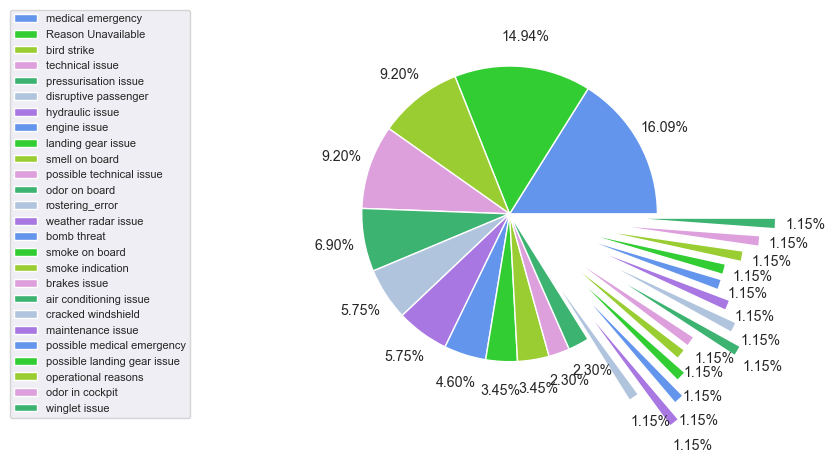

In [123]:
#Calculate the overall diversion reason percentage from the web source 
overall_diversions = db_diverted_data_df.value_counts(subset=['DIVERTED_REASON']).reset_index() 
overall_diversions_df = pd.DataFrame(overall_diversions)
overall_diversions_df.columns = ['DIVERTED_REASON','TOTAL']
overall_diversions_df['PERCENTAGE'] = round(overall_diversions_df.TOTAL/overall_diversions_df.TOTAL.sum()*100,2)

overall_diversions_df = overall_diversions_df.sort_values('PERCENTAGE',ascending=False)

colors = [ # matplotlib named colors 
         'cornflowerblue','limegreen','yellowgreen','plum','mediumseagreen','lightsteelblue',
        # any color using the color codes
        "#a977e2"]
plt.pie(overall_diversions_df['PERCENTAGE'],colors=colors, 
        autopct='%.2f%%',  pctdistance=1.2,
        explode = [0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.8,0.7,0.6,0.5,0.5,0.8,0.7,0.6,0.5,0.5,0.6,0.7,0.8])
plt.legend(labels = overall_diversions_df['DIVERTED_REASON'], 
           loc='center right', bbox_to_anchor=(-0.35, .5), fontsize=8)

>From the above plot, we can see that majority of flight diversions in May'2022 were because of Medical emergencies.
Around 15% of the overall flights diversion reason is unavailable.

In [124]:
#Get the flight diversion reason from the Domestic Flights dataset
flights_diverted = db_flight_info_df[db_flight_info_df.DIVERTED==1].value_counts(subset=['DIVERTED_REASON']).reset_index() 
flights_diverted_df = pd.DataFrame(flights_diverted)
flights_diverted_df.columns = ['DIVERTED_REASON','TOTAL']
flights_diverted_df['PERCENTAGE'] = round(flights_diverted_df.TOTAL/flights_diverted_df.TOTAL.sum()*100,2)

flights_diverted_df = flights_diverted_df.sort_values('PERCENTAGE',ascending=False)
flights_diverted_df 

DIVERTED_REASON  TOTAL  PERCENTAGE
0          Reason Unavailable   1570       99.30
1                 bird strike      2        0.13
2        pressurisation issue      2        0.13
3               winglet issue      2        0.13
4             hydraulic issue      1        0.06
5          landing gear issue      1        0.06
6  possible medical emergency      1        0.06
7              smell on board      1        0.06
8              smoke on board      1        0.06

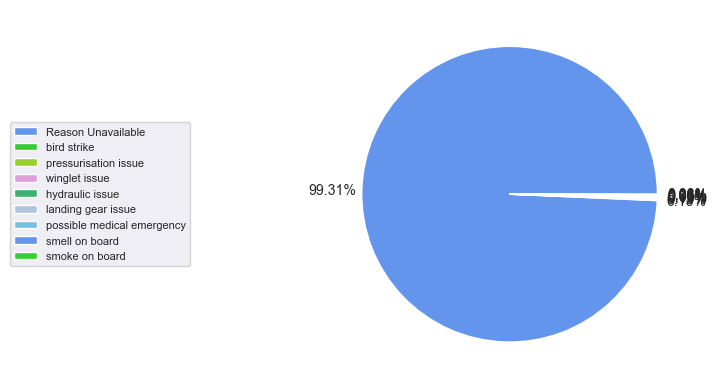

In [125]:
colors = [ # matplotlib named colors 
     'cornflowerblue','limegreen','yellowgreen','plum','mediumseagreen','lightsteelblue',
        # any color using the color codes
        "#77BFE2"]
plt.pie(flights_diverted['PERCENTAGE'], 
        #labels = flights_diverted['DIVERTED_REASON'],
        colors=colors, autopct='%.2f%%', pctdistance=1.2)

plt.legend(labels = flights_diverted['DIVERTED_REASON'], 
           loc='center right', bbox_to_anchor=(-0.35, .5), fontsize=8)

>This plot does not provide any necessary observations because over 95% entries in the flight dataset do not have a match in the diverted data (Web). Reducing the dataset to domestic flights with a match and valid reason for diversion.

([<matplotlib.patches.Wedge at 0x1f270fe69a0>,
 [Text(0.912873821615314, 0.6137274523837531, 'bird strike'),
  Text(-0.22380161216582517, 1.0769924969060731, 'pressurisation issue'),
  Text(-1.081807871121281, 0.19922783435062993, 'winglet issue'),
  Text(-0.8532824190683903, -0.6941967396270282, 'hydraulic issue'),
  Text(-0.368367561785127, -1.0364870184543948, 'landing gear issue'),
  Text(0.22380163737465342, -1.0769924916676181, 'possible medical emergency'),
  Text(0.7508084829026913, -0.803919537019321, 'smell on board'),
  Text(1.059209028465566, -0.29677640407726485, 'smoke on board')],
 [Text(0.49793117542653487, 0.33476042857295624, '18.84%'),
  Text(-0.12207360663590462, 0.587450452857858, '18.84%'),
  Text(-0.5900770206116077, 0.10866972782761632, '18.84%'),
  Text(-0.46542677403730376, -0.3786527670692881, '8.70%'),
  Text(-0.2009277609737056, -0.565356555520579, '8.70%'),
  Text(0.12207362038617457, -0.5874504500005189, '8.70%'),
  Text(0.4095318997651043, -0.43850156564

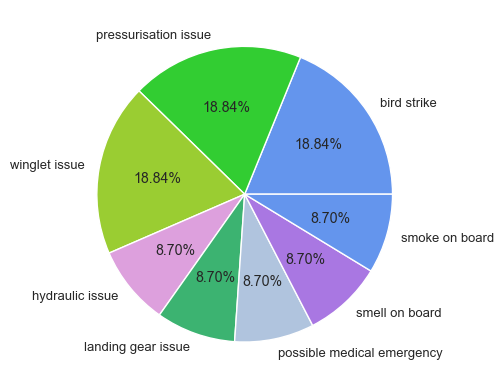

In [126]:
colors = [ # matplotlib named colors 
         'cornflowerblue','limegreen','yellowgreen','plum','mediumseagreen','lightsteelblue',
        # any color using the color codes
        "#a977e2"]
plt.pie(flights_diverted[flights_diverted.DIVERTED_REASON != 'Reason Unavailable']['PERCENTAGE'],
        colors=colors, 
        labels = flights_diverted[flights_diverted.DIVERTED_REASON != 'Reason Unavailable']['DIVERTED_REASON'],   
        autopct='%.2f%%')

>The percentage is based on the few matches we got from the diverted data. It is not enough data but we get an idea of most common diversion reasons.
As suspected, the web data is not 100% accurate. We did not get the diversion reason for all flights diverted in May'2022

#### 2. Flight Delay Reasons

##### Histogram

Text(0.5, 1.0, 'Number of Delays by Delay Reason')

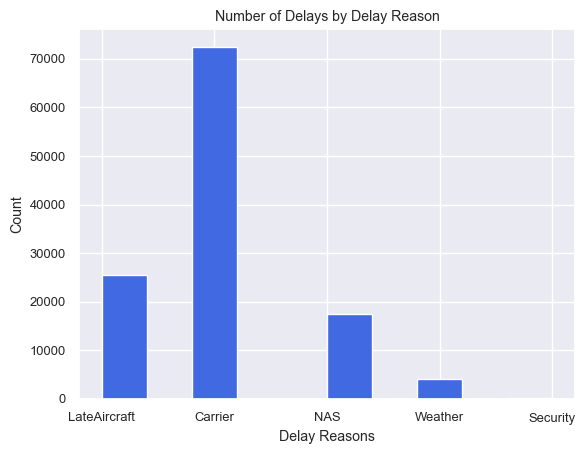

In [127]:
plt.hist(x = db_flight_info_df[db_flight_info_df.STATUS=='Delayed'].DELAY_REASON, color = "royalblue")
plt.xlabel('Delay Reasons') 
plt.ylabel('Count') 
  
# displaying the title
plt.title("Number of Delays by Delay Reason")

#### 3. Weather Delay Reasons (API and Flat file data) 

##### BAR

In [128]:
db_flight_info_df.CONDITIONS.unique()

array([None, 'Rain|Partially cloudy', 'Rain|Overcast', 'Overcast', 'Rain',
       'Partially cloudy', 'Clear'], dtype=object)

Text(0.5, 0, 'Arrival Delay in minutes')

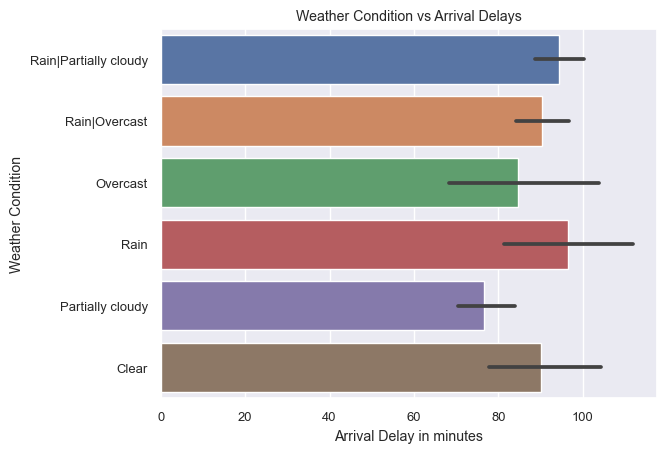

In [129]:
sns.set(font_scale=0.85) 
ax=sns.barplot(x = 'ARR_DELAY',y ='CONDITIONS',
               data = db_flight_info_df[((db_flight_info_df.STATUS =='Delayed') & 
                                         (db_flight_info_df.DELAY_REASON == 'Weather'))])
ax.set_title("Weather Condition vs Arrival Delays")
ax.set_ylabel('Weather Condition')
ax.set_xlabel('Arrival Delay in minutes')
#ax.tick_params(axis='x', rotation=90) 

>Since the project is restricted to the month of May, we can see most of the weather delays are due to rain. The average arrival delay is over an hour.

#### 4. Correlation heatmap (Merged data from all 3 sources)

##### Heatmap

In [130]:
corr_df = db_flight_info_df.select_dtypes([np.number]) 
corr_df.head(2)

YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  DEP_DELAY  \
0  2022.0      2.0    5.0           1.0          7.0       -9.0   
1  2022.0      2.0    5.0           1.0          7.0       -8.0   

   DEP_DELAY_NEW  TAXI_OUT  TAXI_IN  ARR_TIME  ...  WIND_DIRECTION  \
0            0.0      11.0     22.0    1122.0  ...             NaN   
1            0.0      13.0     12.0    1539.0  ...             NaN   

   WIND_CHILL  PRECIPITATION  PRECIPITATION_COVER  SNOW_DEPTH  VISIBILITY  \
0         NaN            NaN                  NaN         NaN         NaN   
1         NaN            NaN                  NaN         NaN         NaN   

   CLOUD_COVER  SEA_LEVEL_PRESSURE  LATITUDE  LONGITUDE  
0          NaN                 NaN       NaN        NaN  
1          NaN                 NaN       NaN        NaN  

[2 rows x 39 columns]

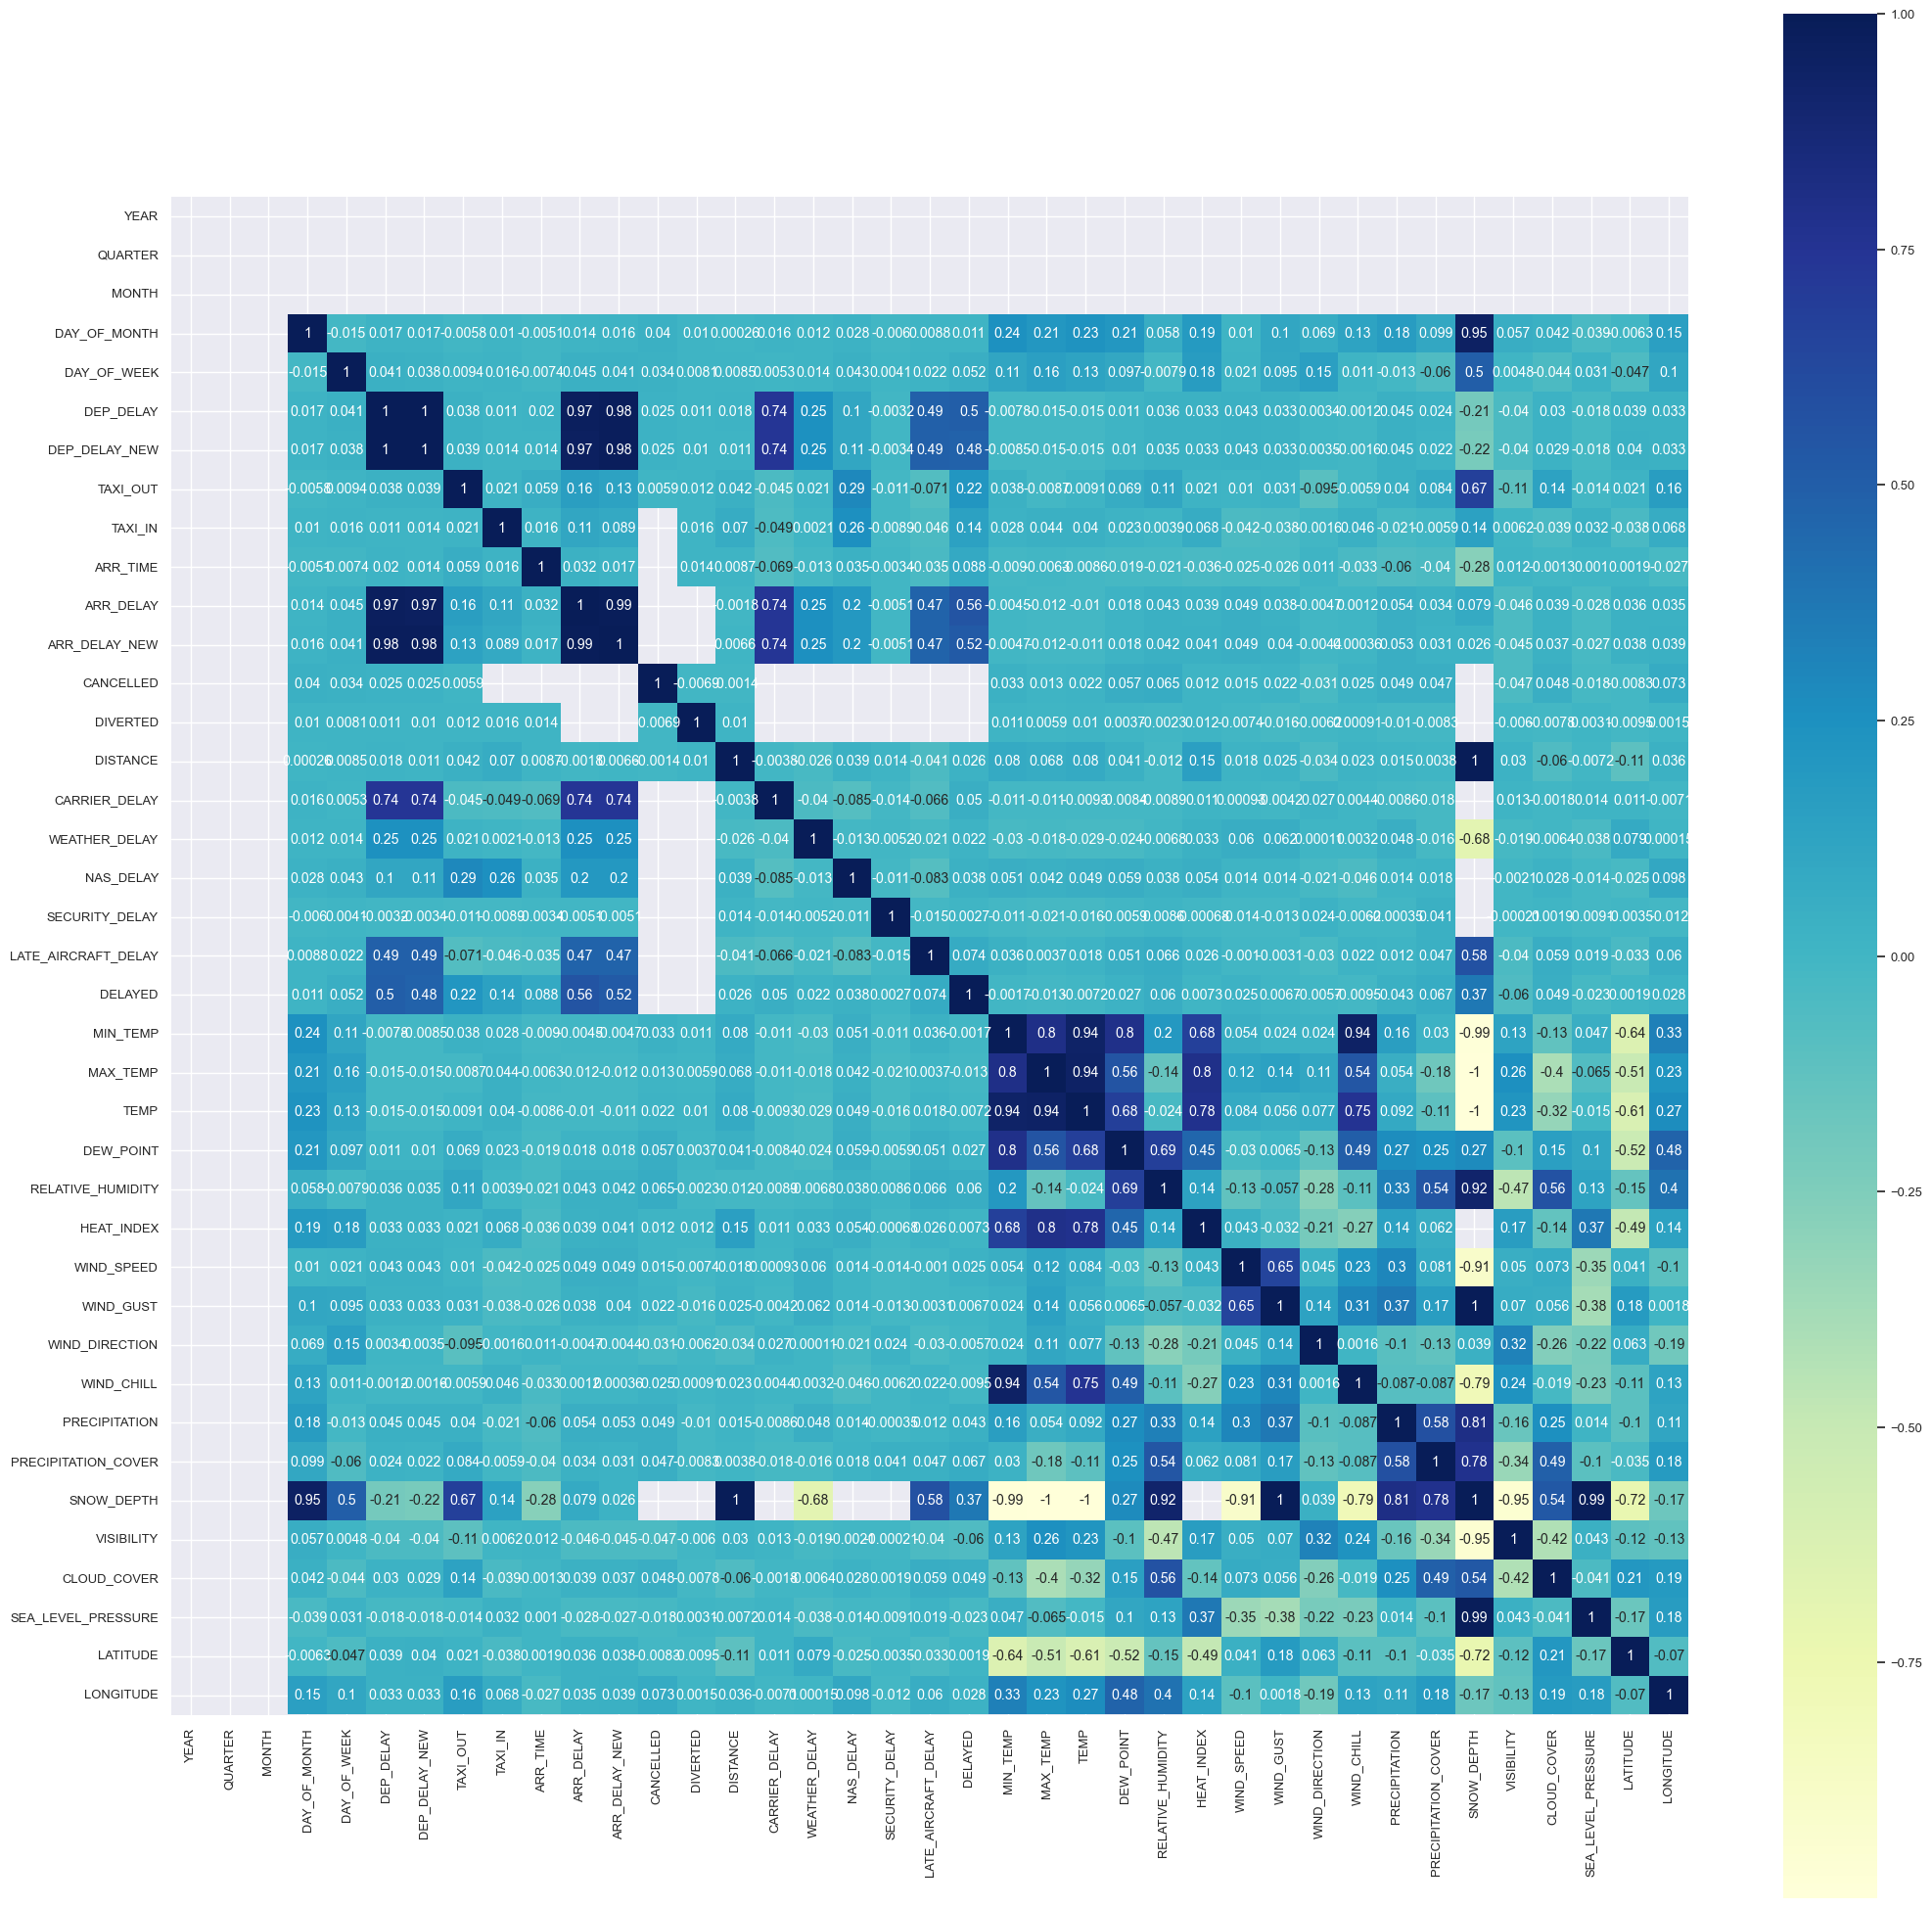

In [131]:
corrmat = corr_df.corr()
f, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corrmat, vmax=1, square=True,annot=True,cmap='YlGnBu');
plt.show()

#### 5. Operating Airline and Weather Conditions

#####  BAR

In [132]:
#Calculate the percentage of operating flights by carrier that were delayed due to weather
flight_carrier_totals = db_flight_info_df[((db_flight_info_df.STATUS =='Delayed')  & (db_flight_info_df.DELAY_REASON == 'Weather'))].value_counts(subset=['OP_UNIQUE_CARRIER_FL']).reset_index() 
flight_carrier_totals = pd.DataFrame(flight_carrier_totals)
flight_carrier_totals.columns = ['OP_UNIQUE_CARRIER_FL','TOTAL']
flight_carrier_totals['PERCENTAGE'] = round(flight_carrier_totals.TOTAL/flight_carrier_totals.TOTAL.sum()*100,2)
flight_carrier_totals = flight_carrier_totals.sort_values('PERCENTAGE',ascending=False)
flight_carrier_totals.head(5)

OP_UNIQUE_CARRIER_FL  TOTAL  PERCENTAGE
0                   OO    926       22.30
1                   AA    659       15.87
2                   DL    314        7.56
3                   NK    268        6.45
4                   UA    263        6.33

In [133]:
#Get the counts of flights by weather reason and calculate the percentage o
carrier_weather_condition = db_flight_info_df[((db_flight_info_df.STATUS =='Delayed')  & (db_flight_info_df.DELAY_REASON == 'Weather'))].value_counts(subset=['OP_UNIQUE_CARRIER_FL','CONDITIONS']).reset_index() 
carrier_weather_condition_df = pd.DataFrame(carrier_weather_condition)
carrier_weather_condition_df.columns = ['OP_UNIQUE_CARRIER_FL','CONDITIONS','COUNT']
carrier_weather_condition_df = carrier_weather_condition_df.sort_values('OP_UNIQUE_CARRIER_FL')
carrier_weather_condition_df['PERCENTAGE'] = ''
            
#print(weather_condition_df.head(10))
for index, row in carrier_weather_condition_df.iterrows():
    tot = flight_carrier_totals.loc[flight_carrier_totals.OP_UNIQUE_CARRIER_FL==row.OP_UNIQUE_CARRIER_FL].TOTAL.values
    val = (row.COUNT/tot * 100)   
    carrier_weather_condition_df.at[index,'PERCENTAGE'] = round(val[0].astype(float),2) 
carrier_weather_condition_df = carrier_weather_condition_df.sort_values(by = ['CONDITIONS','PERCENTAGE'], ascending=[True,False])
carrier_weather_condition_df.head(5)

OP_UNIQUE_CARRIER_FL CONDITIONS  COUNT PERCENTAGE
53                   G4      Clear     16       16.0
7                    OO      Clear    139      15.01
77                   AS      Clear      6       9.23
24                   AA      Clear     46       6.98
49                   NK      Clear     17       6.34

######  Plotly

In [134]:
fig = px.bar(carrier_weather_condition_df, x="OP_UNIQUE_CARRIER_FL", y="PERCENTAGE", 
             color="CONDITIONS",title="Percentage of Weather Delay Reasons per Operating Airline",
             text=carrier_weather_condition_df.PERCENTAGE.apply(lambda x: '{0:1.2f}%'.format(x)),
             labels=dict(OP_UNIQUE_CARRIER_FL="Operating Airlines", PERCENTAGE="Percentage (%)"),
             color_discrete_sequence=colors)
fig.update_xaxes(tickangle=80)
fig.update_layout(autosize=True)
fig.show('notebook')

>Plotly charts cannot be exported to a pdf, sometimes. We'll try to build the same visualization with seaborn and matplotlib. We'll only consider the plotly chart for this project.

######  Seaborn

Text(0.5, 1.0, 'Percentage of Weather Delay Reasons by Operating Airline')

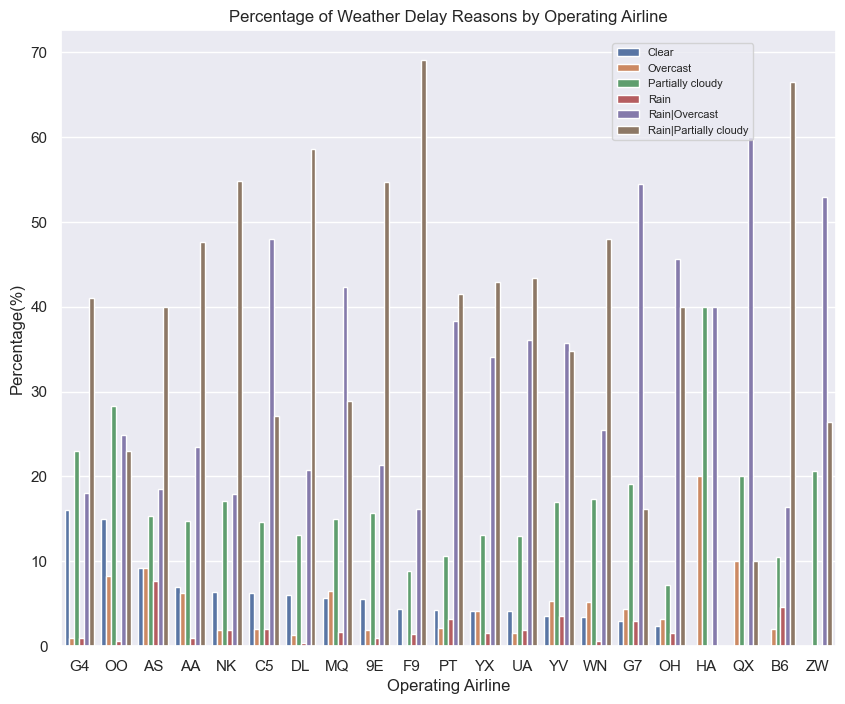

In [141]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data=carrier_weather_condition_df,x="OP_UNIQUE_CARRIER_FL",y="PERCENTAGE",  hue="CONDITIONS" )
plt.legend(loc='right', bbox_to_anchor=(0.9, 0.9), fontsize=8)
plt.xlabel('Operating Airline') 
plt.ylabel('Percentage(%)') 
  
# displaying the title
plt.title("Percentage of Weather Delay Reasons by Operating Airline")

######  Matplotlib

Text(0.5, 1.0, 'Percentage of weather delay reasons per operating airline')

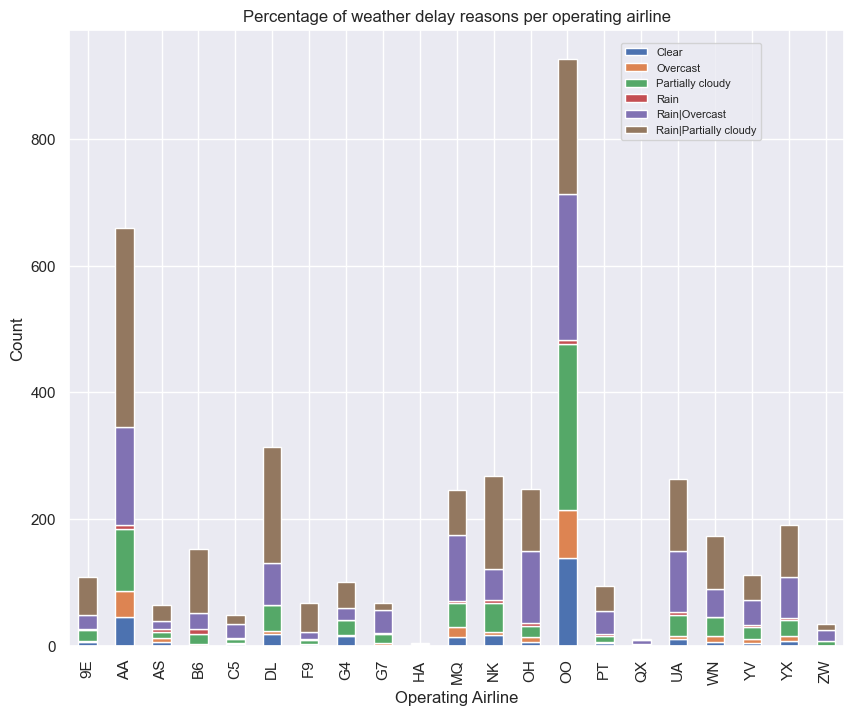

In [144]:
figsize=(8,8)
db_flight_info_df[((db_flight_info_df.STATUS =='Delayed')  & (db_flight_info_df.DELAY_REASON == 'Weather'))].groupby(['OP_UNIQUE_CARRIER_FL','CONDITIONS']).size().unstack().plot(kind='bar', stacked=True)
plt.legend(loc='right', bbox_to_anchor=(0.9, 0.9), fontsize=8)
plt.xlabel('Operating Airline') 
plt.ylabel('Count') 
  
# displaying the title
plt.title("Percentage of weather delay reasons per operating airline")

### Conclusion

>For the term project's final milestone, we combined data from three sources: a flat file in CSV format, diverted flight information from a webpage, and weather data from an API. However, we needed to perform additional transformation steps to merge the datasets successfully.

>To prepare the diverted data, we had to modify the flight date format and convert the origin and destination information to match the flat file's 3-character airport codes. Similarly, we modified the flight date format for the weather data and included the operating and marketing carriers in the data frame to merge it with the flight dataset.

>This project highlighted the crucial role of data cleaning and transformation in data science. In real-world scenarios, we encounter complex data sources that require processing and merging for analysis. Throughout this course, I gained valuable skills in web scraping, transforming data into a consistent format, creating tables, storing and retrieving data from SQL tables, and applying visualizations to the final cleansed dataset.

>#### Visualization 
> The following visualizations were created from the final dataset -
>* PIE CHART - A pie chart with different reasons for flight diversions. 
>* HISTOGRAM - A histogram with different delay reasons
>* BAR CHART - A bar chart with reasons for weather delay 
>* HEAT MAP – A visual representation of how data is distributed in the dataframe 1. The annotation is set to get the     correlation for columns.
>* BAR CHART - A stacked bar chart with the percentage of delay per weather condition by operating airline 

>#### Ethical Implications

>While API and Flat file data are reliable, we discovered inaccuracies in the website's data on diverted flights. Additionally, the lack of information on the data source raises concerns about its accuracy and legality. After merging datasets, we found only 12 matching rows with diversion data out of 1581, highlighting the importance of verifying and vetting our data sources.